In [ ]:
!pip install -q torch torchvision matplotlib numpy

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Define the classes
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

  0%|          | 0/9912422 [00:00<?, ?it/s]

100%|██████████| 9912422/9912422 [00:00<00:00, 401352568.75it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

100%|██████████| 28881/28881 [00:00<00:00, 37666571.46it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

100%|██████████| 1648877/1648877 [00:00<00:00, 194632915.79it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

100%|██████████| 4542/4542 [00:00<00:00, 6466574.60it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the neural network
net = Net()

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Epoch 1, Loss: 0.3180453437822968


Epoch 2, Loss: 0.136844083371396


Epoch 3, Loss: 0.09876940876878929


Epoch 4, Loss: 0.07796246351810389


Epoch 5, Loss: 0.06462684953731129


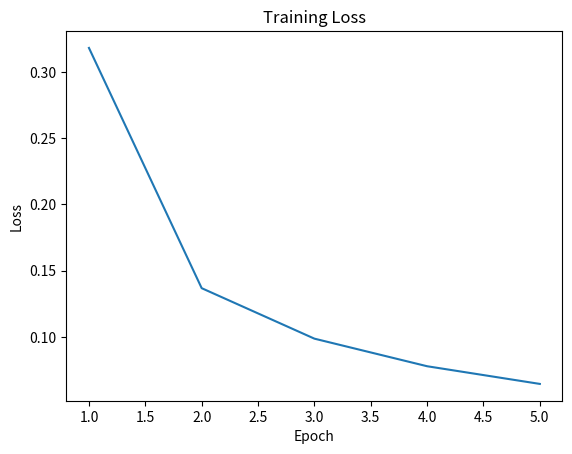

In [ ]:
# Train the neural network
num_epochs = 5
train_loss = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss.append(running_loss / len(trainloader))
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}')

# Plot the training loss
plt.plot(range(1, num_epochs+1), train_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

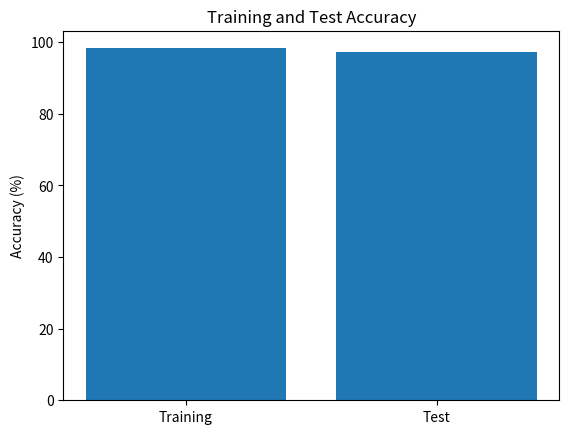

(98.27166666666666, 97.16)

In [ ]:
# Evaluate the accuracy of the model on the test and training datasets
def evaluate_accuracy(loader, net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

train_accuracy = evaluate_accuracy(trainloader, net)
test_accuracy = evaluate_accuracy(testloader, net)

# Plot the test and training accuracy
plt.bar(['Training', 'Test'], [train_accuracy, test_accuracy])
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.show()

train_accuracy, test_accuracy

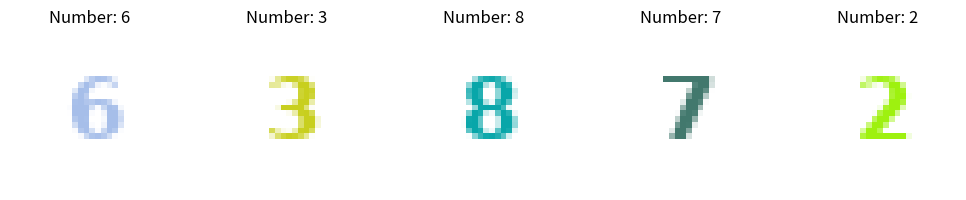

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import random

# Create custom images
def create_custom_image(number):
    img = Image.new('RGB', (28, 28), color = (255, 255, 255))
    d = ImageDraw.Draw(img)
    fnt = ImageFont.truetype('/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf', 15)
    d.text((10,5), str(number), font=fnt, fill=(random.randint(0,255), random.randint(0,255), random.randint(0,255)))
    return img

numbers = [random.randint(0,9) for _ in range(5)]
custom_images = [create_custom_image(num) for num in numbers]

# Display the custom images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for ax, img, num in zip(axes, custom_images, numbers):
    ax.imshow(img)
    ax.set_title(f'Number: {num}')
    ax.axis('off')
plt.tight_layout()
plt.show()

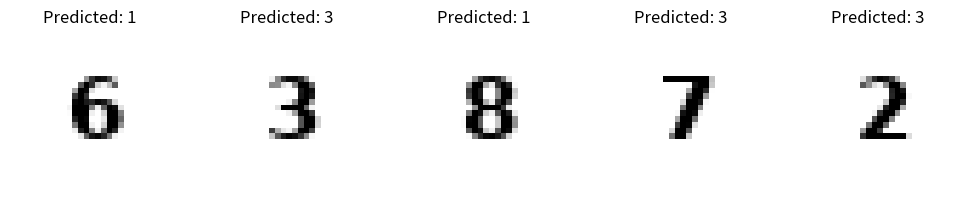

In [ ]:
# Preprocess the custom images to match the format of the MNIST dataset
preprocessed_images = [img.convert('L').resize((28, 28)) for img in custom_images]

# Convert the preprocessed images to PyTorch tensors
tensor_images = [torch.tensor(np.array(img)).float().unsqueeze(0) / 255.0 for img in preprocessed_images]

# Use the trained model to predict the numbers in the preprocessed images
predictions = [torch.argmax(net(img)).item() for img in tensor_images]

# Display the preprocessed images and the results of the predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for ax, img, pred in zip(axes, preprocessed_images, predictions):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Predicted: {pred}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
!pip install -q tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flytekit 1.2.11 requires grpcio!=1.45.0,<1.49.1,<2.0,>=1.43.0, but you have grpcio 1.57.0 which is incompatible.
flytekit 1.2.11 requires protobuf<4,>=3.6.1, but you have protobuf 4.21.7 which is incompatible.
dagster 1.0.15 requires grpcio<1.48.1,>=1.32.0, but you have grpcio 1.57.0 which is incompatible.
dagster 1.0.15 requires protobuf<4,>=3.13.0, but you have protobuf 4.21.7 which is incompatible.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the neural network
model = keras.Sequential([
    layers.InputLayer(input_shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

2023-08-17 12:30:29.462899: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-08-17 12:30:30.774070: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


    8192/11490434 [..............................] - ETA: 0s

 1515520/11490434 [==>...........................] - ETA: 0s

 4022272/11490434 [=========>....................] - ETA: 0s

 7872512/11490434 [===================>..........] - ETA: 0s

10469376/11490434 [==========================>...] - ETA: 0s

11490434/11490434 [==============================] - 0s 0us/step


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 flatten (Flatten)           (None, 784)               0         


 dense (Dense)               (None, 128)               100480    


 dense_1 (Dense)             (None, 10)                1290      


Total params: 101770 (397.54 KB)


Trainable params: 101770 (397.54 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


1719/1875 [==========================>...] - ETA: 1s - loss: 0.0762 - accuracy: 0.9767

1731/1875 [==========================>...] - ETA: 1s - loss: 0.0760 - accuracy: 0.9768

1745/1875 [==========================>...] - ETA: 0s - loss: 0.0763 - accuracy: 0.9768

1759/1875 [===========================>..] - ETA: 0s - loss: 0.0762 - accuracy: 0.9767

1773/1875 [===========================>..] - ETA: 0s - loss: 0.0760 - accuracy: 0.9768

1787/1875 [===========================>..] - ETA: 0s - loss: 0.0761 - accuracy: 0.9768

1800/1875 [===========================>..] - ETA: 0s - loss: 0.0760 - accuracy: 0.9768

1815/1875 [============================>.] - ETA: 0s - loss: 0.0757 - accuracy: 0.9769

1829/1875 [============================>.] - ETA: 0s - loss: 0.0757 - accuracy: 0.9769

1842/1875 [============================>.] - ETA: 0s - loss: 0.0757 - accuracy: 0.9769

1856/1875 [============================>.] - ETA: 0s - loss: 0.0758 - accuracy: 0.9769

1870/1875 [============================>.] - ETA: 0s - loss: 0.0760 - accuracy: 0.9768

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0760 - accuracy: 0.9768 - val_loss: 0.0808 - val_accuracy: 0.9746


Epoch 4/10


   1/1875 [..............................] - ETA: 7s - loss: 0.1666 - accuracy: 0.9375

  10/1875 [..............................] - ETA: 17s - loss: 0.0524 - accuracy: 0.9844

  20/1875 [..............................] - ETA: 17s - loss: 0.0380 - accuracy: 0.9922

  34/1875 [..............................] - ETA: 15s - loss: 0.0439 - accuracy: 0.9881

  48/1875 [..............................] - ETA: 14s - loss: 0.0452 - accuracy: 0.9876

  61/1875 [..............................] - ETA: 14s - loss: 0.0512 - accuracy: 0.9846

  75/1875 [>.............................] - ETA: 14s - loss: 0.0552 - accuracy: 0.9850

  89/1875 [>.............................] - ETA: 13s - loss: 0.0536 - accuracy: 0.9846

 103/1875 [>.............................] - ETA: 13s - loss: 0.0517 - accuracy: 0.9845

 117/1875 [>.............................] - ETA: 13s - loss: 0.0539 - accuracy: 0.9832

 131/1875 [=>............................] - ETA: 13s - loss: 0.0554 - accuracy: 0.9816

 145/1875 [=>............................] - ETA: 13s - loss: 0.0538 - accuracy: 0.9823

 159/1875 [=>............................] - ETA: 12s - loss: 0.0539 - accuracy: 0.9821

 173/1875 [=>............................] - ETA: 12s - loss: 0.0550 - accuracy: 0.9818

 187/1875 [=>............................] - ETA: 12s - loss: 0.0547 - accuracy: 0.9816

 202/1875 [==>...........................] - ETA: 12s - loss: 0.0560 - accuracy: 0.9819

 215/1875 [==>...........................] - ETA: 12s - loss: 0.0574 - accuracy: 0.9808

 229/1875 [==>...........................] - ETA: 12s - loss: 0.0567 - accuracy: 0.9813

 242/1875 [==>...........................] - ETA: 12s - loss: 0.0569 - accuracy: 0.9814

 256/1875 [===>..........................] - ETA: 11s - loss: 0.0558 - accuracy: 0.9818

 270/1875 [===>..........................] - ETA: 11s - loss: 0.0568 - accuracy: 0.9817

 283/1875 [===>..........................] - ETA: 11s - loss: 0.0566 - accuracy: 0.9818

 297/1875 [===>..........................] - ETA: 11s - loss: 0.0566 - accuracy: 0.9820

 311/1875 [===>..........................] - ETA: 11s - loss: 0.0564 - accuracy: 0.9820

 323/1875 [====>.........................] - ETA: 11s - loss: 0.0563 - accuracy: 0.9818

 338/1875 [====>.........................] - ETA: 11s - loss: 0.0562 - accuracy: 0.9817

 352/1875 [====>.........................] - ETA: 11s - loss: 0.0564 - accuracy: 0.9817

 366/1875 [====>.........................] - ETA: 11s - loss: 0.0552 - accuracy: 0.9822

 379/1875 [=====>........................] - ETA: 11s - loss: 0.0544 - accuracy: 0.9824

 394/1875 [=====>........................] - ETA: 10s - loss: 0.0538 - accuracy: 0.9825

 408/1875 [=====>........................] - ETA: 10s - loss: 0.0538 - accuracy: 0.9825

 421/1875 [=====>........................] - ETA: 10s - loss: 0.0538 - accuracy: 0.9823

 435/1875 [=====>........................] - ETA: 10s - loss: 0.0534 - accuracy: 0.9825

 449/1875 [======>.......................] - ETA: 10s - loss: 0.0528 - accuracy: 0.9827

 464/1875 [======>.......................] - ETA: 10s - loss: 0.0531 - accuracy: 0.9827

 477/1875 [======>.......................] - ETA: 10s - loss: 0.0543 - accuracy: 0.9825

 491/1875 [======>.......................] - ETA: 10s - loss: 0.0552 - accuracy: 0.9822

 505/1875 [=======>......................] - ETA: 10s - loss: 0.0554 - accuracy: 0.9821

 518/1875 [=======>......................] - ETA: 9s - loss: 0.0550 - accuracy: 0.9822 

 532/1875 [=======>......................] - ETA: 9s - loss: 0.0559 - accuracy: 0.9821

 546/1875 [=======>......................] - ETA: 9s - loss: 0.0556 - accuracy: 0.9822

 559/1875 [=======>......................] - ETA: 9s - loss: 0.0557 - accuracy: 0.9823

 574/1875 [========>.....................] - ETA: 9s - loss: 0.0558 - accuracy: 0.9823

 588/1875 [========>.....................] - ETA: 9s - loss: 0.0557 - accuracy: 0.9822

 601/1875 [========>.....................] - ETA: 9s - loss: 0.0558 - accuracy: 0.9821

 615/1875 [========>.....................] - ETA: 9s - loss: 0.0558 - accuracy: 0.9821

 629/1875 [=========>....................] - ETA: 9s - loss: 0.0558 - accuracy: 0.9820

 642/1875 [=========>....................] - ETA: 9s - loss: 0.0556 - accuracy: 0.9821

 656/1875 [=========>....................] - ETA: 8s - loss: 0.0559 - accuracy: 0.9822

 671/1875 [=========>....................] - ETA: 8s - loss: 0.0562 - accuracy: 0.9819

 684/1875 [=========>....................] - ETA: 8s - loss: 0.0559 - accuracy: 0.9820

 698/1875 [==========>...................] - ETA: 8s - loss: 0.0563 - accuracy: 0.9819

 712/1875 [==========>...................] - ETA: 8s - loss: 0.0563 - accuracy: 0.9819

 725/1875 [==========>...................] - ETA: 8s - loss: 0.0561 - accuracy: 0.9820

 739/1875 [==========>...................] - ETA: 8s - loss: 0.0565 - accuracy: 0.9819

 753/1875 [===========>..................] - ETA: 8s - loss: 0.0566 - accuracy: 0.9818

 767/1875 [===========>..................] - ETA: 8s - loss: 0.0567 - accuracy: 0.9816

 780/1875 [===========>..................] - ETA: 7s - loss: 0.0569 - accuracy: 0.9817

 794/1875 [===========>..................] - ETA: 7s - loss: 0.0573 - accuracy: 0.9815

 808/1875 [===========>..................] - ETA: 7s - loss: 0.0570 - accuracy: 0.9816

 821/1875 [============>.................] - ETA: 7s - loss: 0.0568 - accuracy: 0.9817

 835/1875 [============>.................] - ETA: 7s - loss: 0.0566 - accuracy: 0.9817

 848/1875 [============>.................] - ETA: 7s - loss: 0.0567 - accuracy: 0.9817

 861/1875 [============>.................] - ETA: 7s - loss: 0.0569 - accuracy: 0.9816

 874/1875 [============>.................] - ETA: 7s - loss: 0.0571 - accuracy: 0.9816

 887/1875 [=============>................] - ETA: 7s - loss: 0.0578 - accuracy: 0.9813

 898/1875 [=============>................] - ETA: 7s - loss: 0.0578 - accuracy: 0.9813

 911/1875 [=============>................] - ETA: 7s - loss: 0.0578 - accuracy: 0.9812

 925/1875 [=============>................] - ETA: 6s - loss: 0.0577 - accuracy: 0.9812

 938/1875 [==============>...............] - ETA: 6s - loss: 0.0577 - accuracy: 0.9813

 952/1875 [==============>...............] - ETA: 6s - loss: 0.0583 - accuracy: 0.9812

 967/1875 [==============>...............] - ETA: 6s - loss: 0.0583 - accuracy: 0.9811

 981/1875 [==============>...............] - ETA: 6s - loss: 0.0584 - accuracy: 0.9810

 996/1875 [==============>...............] - ETA: 6s - loss: 0.0583 - accuracy: 0.9810

1009/1875 [===============>..............] - ETA: 6s - loss: 0.0585 - accuracy: 0.9810

1023/1875 [===============>..............] - ETA: 6s - loss: 0.0586 - accuracy: 0.9810

1036/1875 [===============>..............] - ETA: 6s - loss: 0.0588 - accuracy: 0.9810

1050/1875 [===============>..............] - ETA: 6s - loss: 0.0591 - accuracy: 0.9809

1064/1875 [================>.............] - ETA: 5s - loss: 0.0591 - accuracy: 0.9809

1078/1875 [================>.............] - ETA: 5s - loss: 0.0593 - accuracy: 0.9809

1091/1875 [================>.............] - ETA: 5s - loss: 0.0589 - accuracy: 0.9810

1105/1875 [================>.............] - ETA: 5s - loss: 0.0590 - accuracy: 0.9810

1118/1875 [================>.............] - ETA: 5s - loss: 0.0590 - accuracy: 0.9810

1131/1875 [=================>............] - ETA: 5s - loss: 0.0589 - accuracy: 0.9811

1144/1875 [=================>............] - ETA: 5s - loss: 0.0588 - accuracy: 0.9811

1158/1875 [=================>............] - ETA: 5s - loss: 0.0589 - accuracy: 0.9810

1172/1875 [=================>............] - ETA: 5s - loss: 0.0588 - accuracy: 0.9811

1186/1875 [=================>............] - ETA: 5s - loss: 0.0585 - accuracy: 0.9813

1200/1875 [==================>...........] - ETA: 4s - loss: 0.0588 - accuracy: 0.9812

1213/1875 [==================>...........] - ETA: 4s - loss: 0.0587 - accuracy: 0.9813

1227/1875 [==================>...........] - ETA: 4s - loss: 0.0585 - accuracy: 0.9813

1241/1875 [==================>...........] - ETA: 4s - loss: 0.0586 - accuracy: 0.9812

1256/1875 [===================>..........] - ETA: 4s - loss: 0.0585 - accuracy: 0.9812

1270/1875 [===================>..........] - ETA: 4s - loss: 0.0582 - accuracy: 0.9813

1283/1875 [===================>..........] - ETA: 4s - loss: 0.0586 - accuracy: 0.9811

1297/1875 [===================>..........] - ETA: 4s - loss: 0.0586 - accuracy: 0.9811

1311/1875 [===================>..........] - ETA: 4s - loss: 0.0585 - accuracy: 0.9811

1324/1875 [====================>.........] - ETA: 4s - loss: 0.0584 - accuracy: 0.9811

1336/1875 [====================>.........] - ETA: 3s - loss: 0.0583 - accuracy: 0.9812

1350/1875 [====================>.........] - ETA: 3s - loss: 0.0587 - accuracy: 0.9811

1364/1875 [====================>.........] - ETA: 3s - loss: 0.0588 - accuracy: 0.9811

1379/1875 [=====================>........] - ETA: 3s - loss: 0.0588 - accuracy: 0.9810

1392/1875 [=====================>........] - ETA: 3s - loss: 0.0588 - accuracy: 0.9811

1406/1875 [=====================>........] - ETA: 3s - loss: 0.0587 - accuracy: 0.9811

1421/1875 [=====================>........] - ETA: 3s - loss: 0.0586 - accuracy: 0.9811

1434/1875 [=====================>........] - ETA: 3s - loss: 0.0585 - accuracy: 0.9811

1447/1875 [======================>.......] - ETA: 3s - loss: 0.0584 - accuracy: 0.9811

1462/1875 [======================>.......] - ETA: 3s - loss: 0.0585 - accuracy: 0.9810

1475/1875 [======================>.......] - ETA: 2s - loss: 0.0584 - accuracy: 0.9811

1489/1875 [======================>.......] - ETA: 2s - loss: 0.0584 - accuracy: 0.9811

1502/1875 [=======================>......] - ETA: 2s - loss: 0.0582 - accuracy: 0.9812

1515/1875 [=======================>......] - ETA: 2s - loss: 0.0580 - accuracy: 0.9812

1529/1875 [=======================>......] - ETA: 2s - loss: 0.0581 - accuracy: 0.9812

1543/1875 [=======================>......] - ETA: 2s - loss: 0.0581 - accuracy: 0.9812

1557/1875 [=======================>......] - ETA: 2s - loss: 0.0580 - accuracy: 0.9812

1571/1875 [========================>.....] - ETA: 2s - loss: 0.0581 - accuracy: 0.9811

1585/1875 [========================>.....] - ETA: 2s - loss: 0.0581 - accuracy: 0.9810

1597/1875 [========================>.....] - ETA: 2s - loss: 0.0580 - accuracy: 0.9810

1611/1875 [========================>.....] - ETA: 1s - loss: 0.0578 - accuracy: 0.9811

1625/1875 [=========================>....] - ETA: 1s - loss: 0.0576 - accuracy: 0.9812

1639/1875 [=========================>....] - ETA: 1s - loss: 0.0574 - accuracy: 0.9812

1652/1875 [=========================>....] - ETA: 1s - loss: 0.0573 - accuracy: 0.9812

1666/1875 [=========================>....] - ETA: 1s - loss: 0.0573 - accuracy: 0.9813

1679/1875 [=========================>....] - ETA: 1s - loss: 0.0572 - accuracy: 0.9813

1693/1875 [==========================>...] - ETA: 1s - loss: 0.0572 - accuracy: 0.9813

1706/1875 [==========================>...] - ETA: 1s - loss: 0.0572 - accuracy: 0.9813

1720/1875 [==========================>...] - ETA: 1s - loss: 0.0572 - accuracy: 0.9812

1733/1875 [==========================>...] - ETA: 1s - loss: 0.0572 - accuracy: 0.9812

1747/1875 [==========================>...] - ETA: 0s - loss: 0.0573 - accuracy: 0.9812

1762/1875 [===========================>..] - ETA: 0s - loss: 0.0575 - accuracy: 0.9812

1775/1875 [===========================>..] - ETA: 0s - loss: 0.0573 - accuracy: 0.9813

1788/1875 [===========================>..] - ETA: 0s - loss: 0.0573 - accuracy: 0.9813

1801/1875 [===========================>..] - ETA: 0s - loss: 0.0573 - accuracy: 0.9812

1815/1875 [============================>.] - ETA: 0s - loss: 0.0571 - accuracy: 0.9813

1828/1875 [============================>.] - ETA: 0s - loss: 0.0571 - accuracy: 0.9813

1841/1875 [============================>.] - ETA: 0s - loss: 0.0571 - accuracy: 0.9813

1854/1875 [============================>.] - ETA: 0s - loss: 0.0569 - accuracy: 0.9813

1868/1875 [============================>.] - ETA: 0s - loss: 0.0568 - accuracy: 0.9813

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0568 - accuracy: 0.9814 - val_loss: 0.0864 - val_accuracy: 0.9738


Epoch 5/10


   1/1875 [..............................] - ETA: 1:38 - loss: 0.0030 - accuracy: 1.0000

  14/1875 [..............................] - ETA: 14s - loss: 0.0348 - accuracy: 0.9888 

  27/1875 [..............................] - ETA: 14s - loss: 0.0328 - accuracy: 0.9896

  40/1875 [..............................] - ETA: 14s - loss: 0.0298 - accuracy: 0.9914

  55/1875 [..............................] - ETA: 13s - loss: 0.0312 - accuracy: 0.9898

  68/1875 [>.............................] - ETA: 13s - loss: 0.0318 - accuracy: 0.9899

  82/1875 [>.............................] - ETA: 13s - loss: 0.0311 - accuracy: 0.9905

  95/1875 [>.............................] - ETA: 13s - loss: 0.0306 - accuracy: 0.9908

 109/1875 [>.............................] - ETA: 13s - loss: 0.0301 - accuracy: 0.9905

 123/1875 [>.............................] - ETA: 12s - loss: 0.0319 - accuracy: 0.9903

 137/1875 [=>............................] - ETA: 12s - loss: 0.0316 - accuracy: 0.9902

 152/1875 [=>............................] - ETA: 12s - loss: 0.0310 - accuracy: 0.9905

 164/1875 [=>............................] - ETA: 12s - loss: 0.0308 - accuracy: 0.9905

 178/1875 [=>............................] - ETA: 12s - loss: 0.0310 - accuracy: 0.9903

 192/1875 [==>...........................] - ETA: 12s - loss: 0.0324 - accuracy: 0.9901

 205/1875 [==>...........................] - ETA: 12s - loss: 0.0332 - accuracy: 0.9896

 219/1875 [==>...........................] - ETA: 12s - loss: 0.0332 - accuracy: 0.9897

 231/1875 [==>...........................] - ETA: 12s - loss: 0.0326 - accuracy: 0.9900

 245/1875 [==>...........................] - ETA: 12s - loss: 0.0326 - accuracy: 0.9901

 258/1875 [===>..........................] - ETA: 11s - loss: 0.0328 - accuracy: 0.9898

 272/1875 [===>..........................] - ETA: 11s - loss: 0.0325 - accuracy: 0.9897

 285/1875 [===>..........................] - ETA: 11s - loss: 0.0337 - accuracy: 0.9893

 299/1875 [===>..........................] - ETA: 11s - loss: 0.0334 - accuracy: 0.9895

 312/1875 [===>..........................] - ETA: 11s - loss: 0.0334 - accuracy: 0.9894

 326/1875 [====>.........................] - ETA: 11s - loss: 0.0342 - accuracy: 0.9895

 339/1875 [====>.........................] - ETA: 11s - loss: 0.0344 - accuracy: 0.9892

 353/1875 [====>.........................] - ETA: 11s - loss: 0.0351 - accuracy: 0.9890

 366/1875 [====>.........................] - ETA: 11s - loss: 0.0357 - accuracy: 0.9887

 380/1875 [=====>........................] - ETA: 11s - loss: 0.0355 - accuracy: 0.9888

 390/1875 [=====>........................] - ETA: 11s - loss: 0.0362 - accuracy: 0.9886

 404/1875 [=====>........................] - ETA: 10s - loss: 0.0361 - accuracy: 0.9886

 416/1875 [=====>........................] - ETA: 10s - loss: 0.0371 - accuracy: 0.9884

 429/1875 [=====>........................] - ETA: 10s - loss: 0.0367 - accuracy: 0.9886

 443/1875 [======>.......................] - ETA: 10s - loss: 0.0368 - accuracy: 0.9888

 456/1875 [======>.......................] - ETA: 10s - loss: 0.0371 - accuracy: 0.9886

 470/1875 [======>.......................] - ETA: 10s - loss: 0.0370 - accuracy: 0.9887

 484/1875 [======>.......................] - ETA: 10s - loss: 0.0375 - accuracy: 0.9886

 498/1875 [======>.......................] - ETA: 10s - loss: 0.0382 - accuracy: 0.9883

 511/1875 [=======>......................] - ETA: 10s - loss: 0.0379 - accuracy: 0.9884

 525/1875 [=======>......................] - ETA: 10s - loss: 0.0379 - accuracy: 0.9885

 538/1875 [=======>......................] - ETA: 9s - loss: 0.0381 - accuracy: 0.9884 

 552/1875 [=======>......................] - ETA: 9s - loss: 0.0389 - accuracy: 0.9881

 566/1875 [========>.....................] - ETA: 9s - loss: 0.0393 - accuracy: 0.9880

 581/1875 [========>.....................] - ETA: 9s - loss: 0.0400 - accuracy: 0.9879

 595/1875 [========>.....................] - ETA: 9s - loss: 0.0402 - accuracy: 0.9878

 608/1875 [========>.....................] - ETA: 9s - loss: 0.0401 - accuracy: 0.9878

 622/1875 [========>.....................] - ETA: 9s - loss: 0.0401 - accuracy: 0.9877

 635/1875 [=========>....................] - ETA: 9s - loss: 0.0398 - accuracy: 0.9878

 649/1875 [=========>....................] - ETA: 9s - loss: 0.0396 - accuracy: 0.9878

 663/1875 [=========>....................] - ETA: 8s - loss: 0.0397 - accuracy: 0.9877

 676/1875 [=========>....................] - ETA: 8s - loss: 0.0395 - accuracy: 0.9877

 689/1875 [==========>...................] - ETA: 8s - loss: 0.0393 - accuracy: 0.9877

 703/1875 [==========>...................] - ETA: 8s - loss: 0.0398 - accuracy: 0.9874

 716/1875 [==========>...................] - ETA: 8s - loss: 0.0398 - accuracy: 0.9875

 731/1875 [==========>...................] - ETA: 8s - loss: 0.0397 - accuracy: 0.9875

 745/1875 [==========>...................] - ETA: 8s - loss: 0.0400 - accuracy: 0.9873

 759/1875 [===========>..................] - ETA: 8s - loss: 0.0400 - accuracy: 0.9872

 773/1875 [===========>..................] - ETA: 8s - loss: 0.0399 - accuracy: 0.9873

 786/1875 [===========>..................] - ETA: 8s - loss: 0.0400 - accuracy: 0.9872

 800/1875 [===========>..................] - ETA: 7s - loss: 0.0398 - accuracy: 0.9873

 813/1875 [============>.................] - ETA: 7s - loss: 0.0400 - accuracy: 0.9872

 827/1875 [============>.................] - ETA: 7s - loss: 0.0401 - accuracy: 0.9873

 840/1875 [============>.................] - ETA: 7s - loss: 0.0403 - accuracy: 0.9872

 854/1875 [============>.................] - ETA: 7s - loss: 0.0406 - accuracy: 0.9871

 868/1875 [============>.................] - ETA: 7s - loss: 0.0403 - accuracy: 0.9872

 882/1875 [=============>................] - ETA: 7s - loss: 0.0400 - accuracy: 0.9873

 896/1875 [=============>................] - ETA: 7s - loss: 0.0398 - accuracy: 0.9874

 910/1875 [=============>................] - ETA: 7s - loss: 0.0404 - accuracy: 0.9873

 923/1875 [=============>................] - ETA: 7s - loss: 0.0403 - accuracy: 0.9874

 938/1875 [==============>...............] - ETA: 6s - loss: 0.0408 - accuracy: 0.9873

 952/1875 [==============>...............] - ETA: 6s - loss: 0.0413 - accuracy: 0.9870

 966/1875 [==============>...............] - ETA: 6s - loss: 0.0416 - accuracy: 0.9870

 979/1875 [==============>...............] - ETA: 6s - loss: 0.0418 - accuracy: 0.9869

 993/1875 [==============>...............] - ETA: 6s - loss: 0.0419 - accuracy: 0.9868

1006/1875 [===============>..............] - ETA: 6s - loss: 0.0424 - accuracy: 0.9869

1019/1875 [===============>..............] - ETA: 6s - loss: 0.0424 - accuracy: 0.9869

1033/1875 [===============>..............] - ETA: 6s - loss: 0.0425 - accuracy: 0.9868

1047/1875 [===============>..............] - ETA: 6s - loss: 0.0423 - accuracy: 0.9868

1062/1875 [===============>..............] - ETA: 5s - loss: 0.0425 - accuracy: 0.9868

1075/1875 [================>.............] - ETA: 5s - loss: 0.0424 - accuracy: 0.9868

1089/1875 [================>.............] - ETA: 5s - loss: 0.0422 - accuracy: 0.9869

1103/1875 [================>.............] - ETA: 5s - loss: 0.0424 - accuracy: 0.9867

1117/1875 [================>.............] - ETA: 5s - loss: 0.0427 - accuracy: 0.9867

1131/1875 [=================>............] - ETA: 5s - loss: 0.0426 - accuracy: 0.9867

1146/1875 [=================>............] - ETA: 5s - loss: 0.0429 - accuracy: 0.9866

1160/1875 [=================>............] - ETA: 5s - loss: 0.0432 - accuracy: 0.9866

1173/1875 [=================>............] - ETA: 5s - loss: 0.0436 - accuracy: 0.9865

1188/1875 [==================>...........] - ETA: 5s - loss: 0.0436 - accuracy: 0.9866

1201/1875 [==================>...........] - ETA: 4s - loss: 0.0436 - accuracy: 0.9866

1215/1875 [==================>...........] - ETA: 4s - loss: 0.0434 - accuracy: 0.9867

1228/1875 [==================>...........] - ETA: 4s - loss: 0.0433 - accuracy: 0.9867

1241/1875 [==================>...........] - ETA: 4s - loss: 0.0434 - accuracy: 0.9867

1254/1875 [===================>..........] - ETA: 4s - loss: 0.0432 - accuracy: 0.9867

1269/1875 [===================>..........] - ETA: 4s - loss: 0.0438 - accuracy: 0.9866

1283/1875 [===================>..........] - ETA: 4s - loss: 0.0438 - accuracy: 0.9866

1296/1875 [===================>..........] - ETA: 4s - loss: 0.0437 - accuracy: 0.9867

1308/1875 [===================>..........] - ETA: 4s - loss: 0.0436 - accuracy: 0.9867

1322/1875 [====================>.........] - ETA: 4s - loss: 0.0434 - accuracy: 0.9868

1336/1875 [====================>.........] - ETA: 3s - loss: 0.0433 - accuracy: 0.9868

1350/1875 [====================>.........] - ETA: 3s - loss: 0.0432 - accuracy: 0.9868

1363/1875 [====================>.........] - ETA: 3s - loss: 0.0435 - accuracy: 0.9868

1376/1875 [=====================>........] - ETA: 3s - loss: 0.0436 - accuracy: 0.9867

1388/1875 [=====================>........] - ETA: 3s - loss: 0.0437 - accuracy: 0.9866

1401/1875 [=====================>........] - ETA: 3s - loss: 0.0436 - accuracy: 0.9866

1414/1875 [=====================>........] - ETA: 3s - loss: 0.0436 - accuracy: 0.9866

1427/1875 [=====================>........] - ETA: 3s - loss: 0.0435 - accuracy: 0.9866

1442/1875 [======================>.......] - ETA: 3s - loss: 0.0436 - accuracy: 0.9866

1455/1875 [======================>.......] - ETA: 3s - loss: 0.0436 - accuracy: 0.9866

1469/1875 [======================>.......] - ETA: 2s - loss: 0.0437 - accuracy: 0.9866

1483/1875 [======================>.......] - ETA: 2s - loss: 0.0437 - accuracy: 0.9865

1498/1875 [======================>.......] - ETA: 2s - loss: 0.0437 - accuracy: 0.9865

1512/1875 [=======================>......] - ETA: 2s - loss: 0.0436 - accuracy: 0.9865

1527/1875 [=======================>......] - ETA: 2s - loss: 0.0438 - accuracy: 0.9864

1541/1875 [=======================>......] - ETA: 2s - loss: 0.0438 - accuracy: 0.9864

1555/1875 [=======================>......] - ETA: 2s - loss: 0.0440 - accuracy: 0.9864

1569/1875 [========================>.....] - ETA: 2s - loss: 0.0439 - accuracy: 0.9863

1581/1875 [========================>.....] - ETA: 2s - loss: 0.0438 - accuracy: 0.9863

1594/1875 [========================>.....] - ETA: 2s - loss: 0.0439 - accuracy: 0.9864

1607/1875 [========================>.....] - ETA: 1s - loss: 0.0439 - accuracy: 0.9863

1620/1875 [========================>.....] - ETA: 1s - loss: 0.0440 - accuracy: 0.9863

1632/1875 [=========================>....] - ETA: 1s - loss: 0.0442 - accuracy: 0.9863

1646/1875 [=========================>....] - ETA: 1s - loss: 0.0443 - accuracy: 0.9862

1659/1875 [=========================>....] - ETA: 1s - loss: 0.0444 - accuracy: 0.9862

1673/1875 [=========================>....] - ETA: 1s - loss: 0.0443 - accuracy: 0.9862

1686/1875 [=========================>....] - ETA: 1s - loss: 0.0444 - accuracy: 0.9862

1700/1875 [==========================>...] - ETA: 1s - loss: 0.0443 - accuracy: 0.9862

1714/1875 [==========================>...] - ETA: 1s - loss: 0.0442 - accuracy: 0.9862

1728/1875 [==========================>...] - ETA: 1s - loss: 0.0441 - accuracy: 0.9862

1741/1875 [==========================>...] - ETA: 0s - loss: 0.0439 - accuracy: 0.9863

1754/1875 [===========================>..] - ETA: 0s - loss: 0.0438 - accuracy: 0.9863

1767/1875 [===========================>..] - ETA: 0s - loss: 0.0437 - accuracy: 0.9863

1781/1875 [===========================>..] - ETA: 0s - loss: 0.0437 - accuracy: 0.9863

1795/1875 [===========================>..] - ETA: 0s - loss: 0.0439 - accuracy: 0.9863

1808/1875 [===========================>..] - ETA: 0s - loss: 0.0440 - accuracy: 0.9863

1822/1875 [============================>.] - ETA: 0s - loss: 0.0440 - accuracy: 0.9863

1835/1875 [============================>.] - ETA: 0s - loss: 0.0440 - accuracy: 0.9863

1849/1875 [============================>.] - ETA: 0s - loss: 0.0439 - accuracy: 0.9863

1862/1875 [============================>.] - ETA: 0s - loss: 0.0443 - accuracy: 0.9862

1875/1875 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9861

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.0816 - val_accuracy: 0.9748


Epoch 6/10


   1/1875 [..............................] - ETA: 8s - loss: 0.0280 - accuracy: 1.0000

   4/1875 [..............................] - ETA: 37s - loss: 0.0227 - accuracy: 0.9922

  17/1875 [..............................] - ETA: 18s - loss: 0.0272 - accuracy: 0.9853

  31/1875 [..............................] - ETA: 15s - loss: 0.0356 - accuracy: 0.9879

  45/1875 [..............................] - ETA: 14s - loss: 0.0314 - accuracy: 0.9903

  59/1875 [..............................] - ETA: 14s - loss: 0.0301 - accuracy: 0.9899

  72/1875 [>.............................] - ETA: 14s - loss: 0.0327 - accuracy: 0.9896

  85/1875 [>.............................] - ETA: 14s - loss: 0.0335 - accuracy: 0.9897

  99/1875 [>.............................] - ETA: 13s - loss: 0.0325 - accuracy: 0.9899

 112/1875 [>.............................] - ETA: 13s - loss: 0.0324 - accuracy: 0.9897

 127/1875 [=>............................] - ETA: 13s - loss: 0.0327 - accuracy: 0.9899

 141/1875 [=>............................] - ETA: 13s - loss: 0.0327 - accuracy: 0.9896

 154/1875 [=>............................] - ETA: 13s - loss: 0.0332 - accuracy: 0.9892

 168/1875 [=>............................] - ETA: 12s - loss: 0.0329 - accuracy: 0.9894

 181/1875 [=>............................] - ETA: 12s - loss: 0.0324 - accuracy: 0.9896

 195/1875 [==>...........................] - ETA: 12s - loss: 0.0326 - accuracy: 0.9896

 209/1875 [==>...........................] - ETA: 12s - loss: 0.0315 - accuracy: 0.9901

 223/1875 [==>...........................] - ETA: 12s - loss: 0.0315 - accuracy: 0.9899

 236/1875 [==>...........................] - ETA: 12s - loss: 0.0306 - accuracy: 0.9902

 250/1875 [===>..........................] - ETA: 12s - loss: 0.0312 - accuracy: 0.9901

 263/1875 [===>..........................] - ETA: 12s - loss: 0.0313 - accuracy: 0.9901

 278/1875 [===>..........................] - ETA: 11s - loss: 0.0331 - accuracy: 0.9899

 292/1875 [===>..........................] - ETA: 11s - loss: 0.0337 - accuracy: 0.9896

 306/1875 [===>..........................] - ETA: 11s - loss: 0.0329 - accuracy: 0.9900

 320/1875 [====>.........................] - ETA: 11s - loss: 0.0329 - accuracy: 0.9897

 333/1875 [====>.........................] - ETA: 11s - loss: 0.0332 - accuracy: 0.9896

 347/1875 [====>.........................] - ETA: 11s - loss: 0.0328 - accuracy: 0.9896

 361/1875 [====>.........................] - ETA: 11s - loss: 0.0323 - accuracy: 0.9897

 375/1875 [=====>........................] - ETA: 11s - loss: 0.0320 - accuracy: 0.9898

 388/1875 [=====>........................] - ETA: 10s - loss: 0.0321 - accuracy: 0.9899

 402/1875 [=====>........................] - ETA: 10s - loss: 0.0317 - accuracy: 0.9900

 414/1875 [=====>........................] - ETA: 10s - loss: 0.0317 - accuracy: 0.9900

 427/1875 [=====>........................] - ETA: 10s - loss: 0.0322 - accuracy: 0.9900

 440/1875 [======>.......................] - ETA: 10s - loss: 0.0319 - accuracy: 0.9901

 455/1875 [======>.......................] - ETA: 10s - loss: 0.0319 - accuracy: 0.9901

 468/1875 [======>.......................] - ETA: 10s - loss: 0.0315 - accuracy: 0.9903

 482/1875 [======>.......................] - ETA: 10s - loss: 0.0314 - accuracy: 0.9905

 496/1875 [======>.......................] - ETA: 10s - loss: 0.0314 - accuracy: 0.9904

 510/1875 [=======>......................] - ETA: 10s - loss: 0.0318 - accuracy: 0.9903

 524/1875 [=======>......................] - ETA: 9s - loss: 0.0319 - accuracy: 0.9903 

 538/1875 [=======>......................] - ETA: 9s - loss: 0.0326 - accuracy: 0.9903

 552/1875 [=======>......................] - ETA: 9s - loss: 0.0323 - accuracy: 0.9904

 565/1875 [========>.....................] - ETA: 9s - loss: 0.0324 - accuracy: 0.9903

 579/1875 [========>.....................] - ETA: 9s - loss: 0.0324 - accuracy: 0.9902

 592/1875 [========>.....................] - ETA: 9s - loss: 0.0331 - accuracy: 0.9899

 606/1875 [========>.....................] - ETA: 9s - loss: 0.0334 - accuracy: 0.9899

 620/1875 [========>.....................] - ETA: 9s - loss: 0.0332 - accuracy: 0.9898

 633/1875 [=========>....................] - ETA: 9s - loss: 0.0335 - accuracy: 0.9897

 647/1875 [=========>....................] - ETA: 9s - loss: 0.0331 - accuracy: 0.9898

 660/1875 [=========>....................] - ETA: 8s - loss: 0.0332 - accuracy: 0.9896

 674/1875 [=========>....................] - ETA: 8s - loss: 0.0329 - accuracy: 0.9898

 689/1875 [==========>...................] - ETA: 8s - loss: 0.0325 - accuracy: 0.9900

 703/1875 [==========>...................] - ETA: 8s - loss: 0.0329 - accuracy: 0.9900

 717/1875 [==========>...................] - ETA: 8s - loss: 0.0335 - accuracy: 0.9898

 731/1875 [==========>...................] - ETA: 8s - loss: 0.0338 - accuracy: 0.9897

 744/1875 [==========>...................] - ETA: 8s - loss: 0.0339 - accuracy: 0.9897

 757/1875 [===========>..................] - ETA: 8s - loss: 0.0340 - accuracy: 0.9896

 770/1875 [===========>..................] - ETA: 8s - loss: 0.0339 - accuracy: 0.9896

 784/1875 [===========>..................] - ETA: 8s - loss: 0.0338 - accuracy: 0.9897

 798/1875 [===========>..................] - ETA: 7s - loss: 0.0341 - accuracy: 0.9897

 812/1875 [===========>..................] - ETA: 7s - loss: 0.0341 - accuracy: 0.9897

 826/1875 [============>.................] - ETA: 7s - loss: 0.0340 - accuracy: 0.9897

 839/1875 [============>.................] - ETA: 7s - loss: 0.0338 - accuracy: 0.9897

 854/1875 [============>.................] - ETA: 7s - loss: 0.0344 - accuracy: 0.9896

 867/1875 [============>.................] - ETA: 7s - loss: 0.0345 - accuracy: 0.9895

 881/1875 [=============>................] - ETA: 7s - loss: 0.0346 - accuracy: 0.9895

 894/1875 [=============>................] - ETA: 7s - loss: 0.0349 - accuracy: 0.9894

 908/1875 [=============>................] - ETA: 7s - loss: 0.0348 - accuracy: 0.9894

 922/1875 [=============>................] - ETA: 6s - loss: 0.0347 - accuracy: 0.9895

 935/1875 [=============>................] - ETA: 6s - loss: 0.0347 - accuracy: 0.9895

 948/1875 [==============>...............] - ETA: 6s - loss: 0.0347 - accuracy: 0.9895

 962/1875 [==============>...............] - ETA: 6s - loss: 0.0346 - accuracy: 0.9895

 975/1875 [==============>...............] - ETA: 6s - loss: 0.0343 - accuracy: 0.9896

 989/1875 [==============>...............] - ETA: 6s - loss: 0.0343 - accuracy: 0.9897

1003/1875 [===============>..............] - ETA: 6s - loss: 0.0343 - accuracy: 0.9897

1017/1875 [===============>..............] - ETA: 6s - loss: 0.0342 - accuracy: 0.9897

1030/1875 [===============>..............] - ETA: 6s - loss: 0.0339 - accuracy: 0.9898

1044/1875 [===============>..............] - ETA: 6s - loss: 0.0338 - accuracy: 0.9898

1058/1875 [===============>..............] - ETA: 5s - loss: 0.0338 - accuracy: 0.9898

1071/1875 [================>.............] - ETA: 5s - loss: 0.0337 - accuracy: 0.9898

1085/1875 [================>.............] - ETA: 5s - loss: 0.0337 - accuracy: 0.9899

1098/1875 [================>.............] - ETA: 5s - loss: 0.0338 - accuracy: 0.9898

1112/1875 [================>.............] - ETA: 5s - loss: 0.0339 - accuracy: 0.9898

1124/1875 [================>.............] - ETA: 5s - loss: 0.0338 - accuracy: 0.9899

1138/1875 [=================>............] - ETA: 5s - loss: 0.0337 - accuracy: 0.9898

1152/1875 [=================>............] - ETA: 5s - loss: 0.0338 - accuracy: 0.9898

1165/1875 [=================>............] - ETA: 5s - loss: 0.0336 - accuracy: 0.9899

1179/1875 [=================>............] - ETA: 5s - loss: 0.0338 - accuracy: 0.9897

1192/1875 [==================>...........] - ETA: 5s - loss: 0.0341 - accuracy: 0.9896

1205/1875 [==================>...........] - ETA: 4s - loss: 0.0340 - accuracy: 0.9896

1219/1875 [==================>...........] - ETA: 4s - loss: 0.0340 - accuracy: 0.9896

1233/1875 [==================>...........] - ETA: 4s - loss: 0.0340 - accuracy: 0.9896

1247/1875 [==================>...........] - ETA: 4s - loss: 0.0338 - accuracy: 0.9897

1260/1875 [===================>..........] - ETA: 4s - loss: 0.0338 - accuracy: 0.9896

1275/1875 [===================>..........] - ETA: 4s - loss: 0.0338 - accuracy: 0.9897

1288/1875 [===================>..........] - ETA: 4s - loss: 0.0339 - accuracy: 0.9897

1302/1875 [===================>..........] - ETA: 4s - loss: 0.0341 - accuracy: 0.9896

1316/1875 [====================>.........] - ETA: 4s - loss: 0.0343 - accuracy: 0.9894

1329/1875 [====================>.........] - ETA: 4s - loss: 0.0343 - accuracy: 0.9894

1342/1875 [====================>.........] - ETA: 3s - loss: 0.0344 - accuracy: 0.9894

1356/1875 [====================>.........] - ETA: 3s - loss: 0.0345 - accuracy: 0.9894

1370/1875 [====================>.........] - ETA: 3s - loss: 0.0344 - accuracy: 0.9894

1384/1875 [=====================>........] - ETA: 3s - loss: 0.0346 - accuracy: 0.9893

1397/1875 [=====================>........] - ETA: 3s - loss: 0.0346 - accuracy: 0.9893

1410/1875 [=====================>........] - ETA: 3s - loss: 0.0346 - accuracy: 0.9892

1423/1875 [=====================>........] - ETA: 3s - loss: 0.0347 - accuracy: 0.9892

1436/1875 [=====================>........] - ETA: 3s - loss: 0.0348 - accuracy: 0.9891

1450/1875 [======================>.......] - ETA: 3s - loss: 0.0348 - accuracy: 0.9891

1464/1875 [======================>.......] - ETA: 3s - loss: 0.0349 - accuracy: 0.9891

1478/1875 [======================>.......] - ETA: 2s - loss: 0.0348 - accuracy: 0.9891

1491/1875 [======================>.......] - ETA: 2s - loss: 0.0347 - accuracy: 0.9891

1505/1875 [=======================>......] - ETA: 2s - loss: 0.0347 - accuracy: 0.9891

1519/1875 [=======================>......] - ETA: 2s - loss: 0.0346 - accuracy: 0.9892

1532/1875 [=======================>......] - ETA: 2s - loss: 0.0345 - accuracy: 0.9892

1545/1875 [=======================>......] - ETA: 2s - loss: 0.0344 - accuracy: 0.9892

1560/1875 [=======================>......] - ETA: 2s - loss: 0.0343 - accuracy: 0.9893

1574/1875 [========================>.....] - ETA: 2s - loss: 0.0343 - accuracy: 0.9893

1588/1875 [========================>.....] - ETA: 2s - loss: 0.0344 - accuracy: 0.9893

1602/1875 [========================>.....] - ETA: 2s - loss: 0.0344 - accuracy: 0.9893

1616/1875 [========================>.....] - ETA: 1s - loss: 0.0343 - accuracy: 0.9894

1629/1875 [=========================>....] - ETA: 1s - loss: 0.0342 - accuracy: 0.9894

1644/1875 [=========================>....] - ETA: 1s - loss: 0.0341 - accuracy: 0.9894

1657/1875 [=========================>....] - ETA: 1s - loss: 0.0341 - accuracy: 0.9894

1671/1875 [=========================>....] - ETA: 1s - loss: 0.0343 - accuracy: 0.9894

1684/1875 [=========================>....] - ETA: 1s - loss: 0.0344 - accuracy: 0.9894

1696/1875 [==========================>...] - ETA: 1s - loss: 0.0344 - accuracy: 0.9894

1710/1875 [==========================>...] - ETA: 1s - loss: 0.0347 - accuracy: 0.9893

1723/1875 [==========================>...] - ETA: 1s - loss: 0.0346 - accuracy: 0.9893

1737/1875 [==========================>...] - ETA: 1s - loss: 0.0346 - accuracy: 0.9893

1751/1875 [===========================>..] - ETA: 0s - loss: 0.0346 - accuracy: 0.9893

1764/1875 [===========================>..] - ETA: 0s - loss: 0.0346 - accuracy: 0.9894

1779/1875 [===========================>..] - ETA: 0s - loss: 0.0346 - accuracy: 0.9894

1792/1875 [===========================>..] - ETA: 0s - loss: 0.0347 - accuracy: 0.9894

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0347 - accuracy: 0.9894

1820/1875 [============================>.] - ETA: 0s - loss: 0.0347 - accuracy: 0.9894

1832/1875 [============================>.] - ETA: 0s - loss: 0.0346 - accuracy: 0.9894

1847/1875 [============================>.] - ETA: 0s - loss: 0.0346 - accuracy: 0.9894

1860/1875 [============================>.] - ETA: 0s - loss: 0.0345 - accuracy: 0.9894

1874/1875 [============================>.] - ETA: 0s - loss: 0.0347 - accuracy: 0.9894

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0684 - val_accuracy: 0.9802


Epoch 7/10


   1/1875 [..............................] - ETA: 7s - loss: 0.0031 - accuracy: 1.0000

   3/1875 [..............................] - ETA: 49s - loss: 0.0036 - accuracy: 1.0000

  16/1875 [..............................] - ETA: 18s - loss: 0.0268 - accuracy: 0.9902

  30/1875 [..............................] - ETA: 16s - loss: 0.0278 - accuracy: 0.9906

  44/1875 [..............................] - ETA: 15s - loss: 0.0304 - accuracy: 0.9901

  57/1875 [..............................] - ETA: 14s - loss: 0.0289 - accuracy: 0.9907

  71/1875 [>.............................] - ETA: 14s - loss: 0.0292 - accuracy: 0.9912

  84/1875 [>.............................] - ETA: 14s - loss: 0.0270 - accuracy: 0.9922

  98/1875 [>.............................] - ETA: 13s - loss: 0.0268 - accuracy: 0.9927

 112/1875 [>.............................] - ETA: 13s - loss: 0.0260 - accuracy: 0.9930

 125/1875 [=>............................] - ETA: 13s - loss: 0.0275 - accuracy: 0.9923

 138/1875 [=>............................] - ETA: 13s - loss: 0.0288 - accuracy: 0.9921

 152/1875 [=>............................] - ETA: 13s - loss: 0.0278 - accuracy: 0.9926

 165/1875 [=>............................] - ETA: 13s - loss: 0.0268 - accuracy: 0.9926

 179/1875 [=>............................] - ETA: 12s - loss: 0.0256 - accuracy: 0.9932

 193/1875 [==>...........................] - ETA: 12s - loss: 0.0248 - accuracy: 0.9934

 207/1875 [==>...........................] - ETA: 12s - loss: 0.0239 - accuracy: 0.9938

 222/1875 [==>...........................] - ETA: 12s - loss: 0.0237 - accuracy: 0.9938

 236/1875 [==>...........................] - ETA: 12s - loss: 0.0230 - accuracy: 0.9942

 250/1875 [===>..........................] - ETA: 12s - loss: 0.0228 - accuracy: 0.9941

 264/1875 [===>..........................] - ETA: 11s - loss: 0.0222 - accuracy: 0.9943

 276/1875 [===>..........................] - ETA: 11s - loss: 0.0217 - accuracy: 0.9945

 289/1875 [===>..........................] - ETA: 11s - loss: 0.0218 - accuracy: 0.9945

 301/1875 [===>..........................] - ETA: 11s - loss: 0.0216 - accuracy: 0.9946

 313/1875 [====>.........................] - ETA: 11s - loss: 0.0224 - accuracy: 0.9943

 326/1875 [====>.........................] - ETA: 11s - loss: 0.0223 - accuracy: 0.9942

 339/1875 [====>.........................] - ETA: 11s - loss: 0.0233 - accuracy: 0.9939

 352/1875 [====>.........................] - ETA: 11s - loss: 0.0229 - accuracy: 0.9940

 365/1875 [====>.........................] - ETA: 11s - loss: 0.0231 - accuracy: 0.9939

 378/1875 [=====>........................] - ETA: 11s - loss: 0.0231 - accuracy: 0.9940

 392/1875 [=====>........................] - ETA: 11s - loss: 0.0238 - accuracy: 0.9939

 406/1875 [=====>........................] - ETA: 11s - loss: 0.0237 - accuracy: 0.9939

 421/1875 [=====>........................] - ETA: 10s - loss: 0.0234 - accuracy: 0.9939

 434/1875 [=====>........................] - ETA: 10s - loss: 0.0231 - accuracy: 0.9940

 448/1875 [======>.......................] - ETA: 10s - loss: 0.0230 - accuracy: 0.9939

 461/1875 [======>.......................] - ETA: 10s - loss: 0.0230 - accuracy: 0.9939

 475/1875 [======>.......................] - ETA: 10s - loss: 0.0231 - accuracy: 0.9937

 488/1875 [======>.......................] - ETA: 10s - loss: 0.0230 - accuracy: 0.9937

 502/1875 [=======>......................] - ETA: 10s - loss: 0.0238 - accuracy: 0.9935

 514/1875 [=======>......................] - ETA: 10s - loss: 0.0239 - accuracy: 0.9935

 528/1875 [=======>......................] - ETA: 10s - loss: 0.0240 - accuracy: 0.9934

 541/1875 [=======>......................] - ETA: 10s - loss: 0.0241 - accuracy: 0.9934

 554/1875 [=======>......................] - ETA: 9s - loss: 0.0240 - accuracy: 0.9934 

 568/1875 [========>.....................] - ETA: 9s - loss: 0.0240 - accuracy: 0.9935

 582/1875 [========>.....................] - ETA: 9s - loss: 0.0240 - accuracy: 0.9933

 595/1875 [========>.....................] - ETA: 9s - loss: 0.0240 - accuracy: 0.9933

 609/1875 [========>.....................] - ETA: 9s - loss: 0.0241 - accuracy: 0.9932

 623/1875 [========>.....................] - ETA: 9s - loss: 0.0245 - accuracy: 0.9931

 637/1875 [=========>....................] - ETA: 9s - loss: 0.0242 - accuracy: 0.9932

 650/1875 [=========>....................] - ETA: 9s - loss: 0.0242 - accuracy: 0.9933

 663/1875 [=========>....................] - ETA: 9s - loss: 0.0240 - accuracy: 0.9934

 677/1875 [=========>....................] - ETA: 8s - loss: 0.0238 - accuracy: 0.9934

 689/1875 [==========>...................] - ETA: 8s - loss: 0.0238 - accuracy: 0.9935

 703/1875 [==========>...................] - ETA: 8s - loss: 0.0237 - accuracy: 0.9935

 718/1875 [==========>...................] - ETA: 8s - loss: 0.0237 - accuracy: 0.9935

 732/1875 [==========>...................] - ETA: 8s - loss: 0.0242 - accuracy: 0.9933

 745/1875 [==========>...................] - ETA: 8s - loss: 0.0244 - accuracy: 0.9933

 759/1875 [===========>..................] - ETA: 8s - loss: 0.0247 - accuracy: 0.9932

 773/1875 [===========>..................] - ETA: 8s - loss: 0.0246 - accuracy: 0.9932

 785/1875 [===========>..................] - ETA: 8s - loss: 0.0246 - accuracy: 0.9932

 798/1875 [===========>..................] - ETA: 8s - loss: 0.0246 - accuracy: 0.9933

 812/1875 [===========>..................] - ETA: 7s - loss: 0.0247 - accuracy: 0.9932

 826/1875 [============>.................] - ETA: 7s - loss: 0.0245 - accuracy: 0.9933

 840/1875 [============>.................] - ETA: 7s - loss: 0.0245 - accuracy: 0.9933

 854/1875 [============>.................] - ETA: 7s - loss: 0.0246 - accuracy: 0.9933

 867/1875 [============>.................] - ETA: 7s - loss: 0.0245 - accuracy: 0.9933

 881/1875 [=============>................] - ETA: 7s - loss: 0.0246 - accuracy: 0.9932

 895/1875 [=============>................] - ETA: 7s - loss: 0.0248 - accuracy: 0.9931

 909/1875 [=============>................] - ETA: 7s - loss: 0.0250 - accuracy: 0.9930

 923/1875 [=============>................] - ETA: 7s - loss: 0.0254 - accuracy: 0.9928

 938/1875 [==============>...............] - ETA: 6s - loss: 0.0259 - accuracy: 0.9926

 952/1875 [==============>...............] - ETA: 6s - loss: 0.0257 - accuracy: 0.9926

 965/1875 [==============>...............] - ETA: 6s - loss: 0.0260 - accuracy: 0.9926

 979/1875 [==============>...............] - ETA: 6s - loss: 0.0261 - accuracy: 0.9924

 992/1875 [==============>...............] - ETA: 6s - loss: 0.0261 - accuracy: 0.9925

1006/1875 [===============>..............] - ETA: 6s - loss: 0.0264 - accuracy: 0.9924

1020/1875 [===============>..............] - ETA: 6s - loss: 0.0266 - accuracy: 0.9922

1034/1875 [===============>..............] - ETA: 6s - loss: 0.0266 - accuracy: 0.9923

1046/1875 [===============>..............] - ETA: 6s - loss: 0.0265 - accuracy: 0.9923

1057/1875 [===============>..............] - ETA: 6s - loss: 0.0265 - accuracy: 0.9923

1071/1875 [================>.............] - ETA: 5s - loss: 0.0265 - accuracy: 0.9923

1085/1875 [================>.............] - ETA: 5s - loss: 0.0265 - accuracy: 0.9922

1099/1875 [================>.............] - ETA: 5s - loss: 0.0270 - accuracy: 0.9922

1112/1875 [================>.............] - ETA: 5s - loss: 0.0269 - accuracy: 0.9922

1127/1875 [=================>............] - ETA: 5s - loss: 0.0272 - accuracy: 0.9920

1139/1875 [=================>............] - ETA: 5s - loss: 0.0273 - accuracy: 0.9919

1153/1875 [=================>............] - ETA: 5s - loss: 0.0273 - accuracy: 0.9919

1167/1875 [=================>............] - ETA: 5s - loss: 0.0280 - accuracy: 0.9919

1180/1875 [=================>............] - ETA: 5s - loss: 0.0279 - accuracy: 0.9919

1194/1875 [==================>...........] - ETA: 5s - loss: 0.0278 - accuracy: 0.9920

1208/1875 [==================>...........] - ETA: 4s - loss: 0.0278 - accuracy: 0.9919

1222/1875 [==================>...........] - ETA: 4s - loss: 0.0278 - accuracy: 0.9919

1236/1875 [==================>...........] - ETA: 4s - loss: 0.0277 - accuracy: 0.9920

1250/1875 [===================>..........] - ETA: 4s - loss: 0.0277 - accuracy: 0.9920

1264/1875 [===================>..........] - ETA: 4s - loss: 0.0277 - accuracy: 0.9920

1278/1875 [===================>..........] - ETA: 4s - loss: 0.0275 - accuracy: 0.9921

1292/1875 [===================>..........] - ETA: 4s - loss: 0.0274 - accuracy: 0.9921

1306/1875 [===================>..........] - ETA: 4s - loss: 0.0274 - accuracy: 0.9921

1320/1875 [====================>.........] - ETA: 4s - loss: 0.0274 - accuracy: 0.9921

1333/1875 [====================>.........] - ETA: 4s - loss: 0.0273 - accuracy: 0.9921

1346/1875 [====================>.........] - ETA: 3s - loss: 0.0274 - accuracy: 0.9920

1360/1875 [====================>.........] - ETA: 3s - loss: 0.0276 - accuracy: 0.9919

1374/1875 [====================>.........] - ETA: 3s - loss: 0.0277 - accuracy: 0.9919

1388/1875 [=====================>........] - ETA: 3s - loss: 0.0277 - accuracy: 0.9918

1402/1875 [=====================>........] - ETA: 3s - loss: 0.0276 - accuracy: 0.9919

1416/1875 [=====================>........] - ETA: 3s - loss: 0.0276 - accuracy: 0.9919

1431/1875 [=====================>........] - ETA: 3s - loss: 0.0275 - accuracy: 0.9919

1445/1875 [======================>.......] - ETA: 3s - loss: 0.0277 - accuracy: 0.9918

1459/1875 [======================>.......] - ETA: 3s - loss: 0.0275 - accuracy: 0.9918

1472/1875 [======================>.......] - ETA: 2s - loss: 0.0275 - accuracy: 0.9918

1484/1875 [======================>.......] - ETA: 2s - loss: 0.0276 - accuracy: 0.9918

1498/1875 [======================>.......] - ETA: 2s - loss: 0.0276 - accuracy: 0.9918

1511/1875 [=======================>......] - ETA: 2s - loss: 0.0276 - accuracy: 0.9918

1524/1875 [=======================>......] - ETA: 2s - loss: 0.0276 - accuracy: 0.9918

1537/1875 [=======================>......] - ETA: 2s - loss: 0.0279 - accuracy: 0.9917

1551/1875 [=======================>......] - ETA: 2s - loss: 0.0278 - accuracy: 0.9918

1564/1875 [========================>.....] - ETA: 2s - loss: 0.0278 - accuracy: 0.9918

1579/1875 [========================>.....] - ETA: 2s - loss: 0.0278 - accuracy: 0.9917

1593/1875 [========================>.....] - ETA: 2s - loss: 0.0278 - accuracy: 0.9917

1607/1875 [========================>.....] - ETA: 1s - loss: 0.0277 - accuracy: 0.9918

1621/1875 [========================>.....] - ETA: 1s - loss: 0.0277 - accuracy: 0.9917

1635/1875 [=========================>....] - ETA: 1s - loss: 0.0279 - accuracy: 0.9917

1649/1875 [=========================>....] - ETA: 1s - loss: 0.0279 - accuracy: 0.9916

1664/1875 [=========================>....] - ETA: 1s - loss: 0.0282 - accuracy: 0.9916

1677/1875 [=========================>....] - ETA: 1s - loss: 0.0282 - accuracy: 0.9916

1690/1875 [==========================>...] - ETA: 1s - loss: 0.0282 - accuracy: 0.9916

1704/1875 [==========================>...] - ETA: 1s - loss: 0.0282 - accuracy: 0.9916

1717/1875 [==========================>...] - ETA: 1s - loss: 0.0281 - accuracy: 0.9916

1730/1875 [==========================>...] - ETA: 1s - loss: 0.0282 - accuracy: 0.9916

1744/1875 [==========================>...] - ETA: 0s - loss: 0.0281 - accuracy: 0.9916

1758/1875 [===========================>..] - ETA: 0s - loss: 0.0281 - accuracy: 0.9916

1771/1875 [===========================>..] - ETA: 0s - loss: 0.0281 - accuracy: 0.9916

1785/1875 [===========================>..] - ETA: 0s - loss: 0.0283 - accuracy: 0.9915

1798/1875 [===========================>..] - ETA: 0s - loss: 0.0283 - accuracy: 0.9915

1813/1875 [============================>.] - ETA: 0s - loss: 0.0285 - accuracy: 0.9914

1826/1875 [============================>.] - ETA: 0s - loss: 0.0285 - accuracy: 0.9914

1840/1875 [============================>.] - ETA: 0s - loss: 0.0287 - accuracy: 0.9913

1853/1875 [============================>.] - ETA: 0s - loss: 0.0287 - accuracy: 0.9914

1867/1875 [============================>.] - ETA: 0s - loss: 0.0288 - accuracy: 0.9913

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0669 - val_accuracy: 0.9790


Epoch 8/10


   1/1875 [..............................] - ETA: 7s - loss: 0.0104 - accuracy: 1.0000

   7/1875 [..............................] - ETA: 22s - loss: 0.0120 - accuracy: 1.0000

  21/1875 [..............................] - ETA: 15s - loss: 0.0228 - accuracy: 0.9940

  34/1875 [..............................] - ETA: 15s - loss: 0.0238 - accuracy: 0.9936

  49/1875 [..............................] - ETA: 14s - loss: 0.0227 - accuracy: 0.9936

  61/1875 [..............................] - ETA: 14s - loss: 0.0209 - accuracy: 0.9939

  75/1875 [>.............................] - ETA: 13s - loss: 0.0221 - accuracy: 0.9942

  89/1875 [>.............................] - ETA: 13s - loss: 0.0216 - accuracy: 0.9947

 102/1875 [>.............................] - ETA: 13s - loss: 0.0212 - accuracy: 0.9951

 115/1875 [>.............................] - ETA: 13s - loss: 0.0203 - accuracy: 0.9954

 129/1875 [=>............................] - ETA: 13s - loss: 0.0204 - accuracy: 0.9952

 143/1875 [=>............................] - ETA: 13s - loss: 0.0196 - accuracy: 0.9956

 156/1875 [=>............................] - ETA: 12s - loss: 0.0210 - accuracy: 0.9952

 171/1875 [=>............................] - ETA: 12s - loss: 0.0210 - accuracy: 0.9947

 184/1875 [=>............................] - ETA: 12s - loss: 0.0200 - accuracy: 0.9951

 198/1875 [==>...........................] - ETA: 12s - loss: 0.0198 - accuracy: 0.9953

 211/1875 [==>...........................] - ETA: 12s - loss: 0.0203 - accuracy: 0.9951

 225/1875 [==>...........................] - ETA: 12s - loss: 0.0212 - accuracy: 0.9947

 238/1875 [==>...........................] - ETA: 12s - loss: 0.0214 - accuracy: 0.9945

 252/1875 [===>..........................] - ETA: 12s - loss: 0.0208 - accuracy: 0.9947

 266/1875 [===>..........................] - ETA: 11s - loss: 0.0201 - accuracy: 0.9948

 279/1875 [===>..........................] - ETA: 11s - loss: 0.0204 - accuracy: 0.9947

 292/1875 [===>..........................] - ETA: 11s - loss: 0.0202 - accuracy: 0.9948

 306/1875 [===>..........................] - ETA: 11s - loss: 0.0202 - accuracy: 0.9946

 319/1875 [====>.........................] - ETA: 11s - loss: 0.0197 - accuracy: 0.9947

 333/1875 [====>.........................] - ETA: 11s - loss: 0.0198 - accuracy: 0.9947

 347/1875 [====>.........................] - ETA: 11s - loss: 0.0197 - accuracy: 0.9947

 360/1875 [====>.........................] - ETA: 11s - loss: 0.0198 - accuracy: 0.9946

 375/1875 [=====>........................] - ETA: 11s - loss: 0.0195 - accuracy: 0.9947

 388/1875 [=====>........................] - ETA: 11s - loss: 0.0195 - accuracy: 0.9946

 401/1875 [=====>........................] - ETA: 10s - loss: 0.0195 - accuracy: 0.9945

 415/1875 [=====>........................] - ETA: 10s - loss: 0.0199 - accuracy: 0.9944

 429/1875 [=====>........................] - ETA: 10s - loss: 0.0197 - accuracy: 0.9945

 443/1875 [======>.......................] - ETA: 10s - loss: 0.0195 - accuracy: 0.9945

 457/1875 [======>.......................] - ETA: 10s - loss: 0.0196 - accuracy: 0.9945

 470/1875 [======>.......................] - ETA: 10s - loss: 0.0195 - accuracy: 0.9944

 484/1875 [======>.......................] - ETA: 10s - loss: 0.0196 - accuracy: 0.9943

 497/1875 [======>.......................] - ETA: 10s - loss: 0.0194 - accuracy: 0.9943

 511/1875 [=======>......................] - ETA: 10s - loss: 0.0200 - accuracy: 0.9943

 526/1875 [=======>......................] - ETA: 9s - loss: 0.0206 - accuracy: 0.9940 

 539/1875 [=======>......................] - ETA: 9s - loss: 0.0205 - accuracy: 0.9940

 552/1875 [=======>......................] - ETA: 9s - loss: 0.0207 - accuracy: 0.9939

 565/1875 [========>.....................] - ETA: 9s - loss: 0.0208 - accuracy: 0.9940

 578/1875 [========>.....................] - ETA: 9s - loss: 0.0207 - accuracy: 0.9941

 591/1875 [========>.....................] - ETA: 9s - loss: 0.0206 - accuracy: 0.9941

 605/1875 [========>.....................] - ETA: 9s - loss: 0.0203 - accuracy: 0.9942

 619/1875 [========>.....................] - ETA: 9s - loss: 0.0203 - accuracy: 0.9942

 634/1875 [=========>....................] - ETA: 9s - loss: 0.0203 - accuracy: 0.9941

 647/1875 [=========>....................] - ETA: 9s - loss: 0.0203 - accuracy: 0.9941

 660/1875 [=========>....................] - ETA: 8s - loss: 0.0202 - accuracy: 0.9940

 674/1875 [=========>....................] - ETA: 8s - loss: 0.0201 - accuracy: 0.9941

 688/1875 [==========>...................] - ETA: 8s - loss: 0.0200 - accuracy: 0.9942

 702/1875 [==========>...................] - ETA: 8s - loss: 0.0197 - accuracy: 0.9942

 716/1875 [==========>...................] - ETA: 8s - loss: 0.0196 - accuracy: 0.9942

 730/1875 [==========>...................] - ETA: 8s - loss: 0.0195 - accuracy: 0.9942

 742/1875 [==========>...................] - ETA: 8s - loss: 0.0194 - accuracy: 0.9943

 756/1875 [===========>..................] - ETA: 8s - loss: 0.0194 - accuracy: 0.9943

 769/1875 [===========>..................] - ETA: 8s - loss: 0.0193 - accuracy: 0.9943

 783/1875 [===========>..................] - ETA: 8s - loss: 0.0193 - accuracy: 0.9943

 797/1875 [===========>..................] - ETA: 7s - loss: 0.0197 - accuracy: 0.9942

 811/1875 [===========>..................] - ETA: 7s - loss: 0.0196 - accuracy: 0.9942

 825/1875 [============>.................] - ETA: 7s - loss: 0.0200 - accuracy: 0.9941

 839/1875 [============>.................] - ETA: 7s - loss: 0.0199 - accuracy: 0.9942

 852/1875 [============>.................] - ETA: 7s - loss: 0.0198 - accuracy: 0.9942

 866/1875 [============>.................] - ETA: 7s - loss: 0.0197 - accuracy: 0.9943

 880/1875 [=============>................] - ETA: 7s - loss: 0.0197 - accuracy: 0.9942

 894/1875 [=============>................] - ETA: 7s - loss: 0.0198 - accuracy: 0.9942

 908/1875 [=============>................] - ETA: 7s - loss: 0.0197 - accuracy: 0.9942

 921/1875 [=============>................] - ETA: 7s - loss: 0.0197 - accuracy: 0.9942

 934/1875 [=============>................] - ETA: 6s - loss: 0.0197 - accuracy: 0.9942

 948/1875 [==============>...............] - ETA: 6s - loss: 0.0195 - accuracy: 0.9943

 962/1875 [==============>...............] - ETA: 6s - loss: 0.0196 - accuracy: 0.9943

 975/1875 [==============>...............] - ETA: 6s - loss: 0.0196 - accuracy: 0.9943

 989/1875 [==============>...............] - ETA: 6s - loss: 0.0196 - accuracy: 0.9943

1002/1875 [===============>..............] - ETA: 6s - loss: 0.0197 - accuracy: 0.9942

1016/1875 [===============>..............] - ETA: 6s - loss: 0.0195 - accuracy: 0.9942

1031/1875 [===============>..............] - ETA: 6s - loss: 0.0194 - accuracy: 0.9943

1043/1875 [===============>..............] - ETA: 6s - loss: 0.0197 - accuracy: 0.9942

1056/1875 [===============>..............] - ETA: 6s - loss: 0.0197 - accuracy: 0.9943

1069/1875 [================>.............] - ETA: 5s - loss: 0.0196 - accuracy: 0.9943

1082/1875 [================>.............] - ETA: 5s - loss: 0.0198 - accuracy: 0.9942

1094/1875 [================>.............] - ETA: 5s - loss: 0.0197 - accuracy: 0.9943

1108/1875 [================>.............] - ETA: 5s - loss: 0.0196 - accuracy: 0.9943

1122/1875 [================>.............] - ETA: 5s - loss: 0.0196 - accuracy: 0.9944

1136/1875 [=================>............] - ETA: 5s - loss: 0.0196 - accuracy: 0.9944

1149/1875 [=================>............] - ETA: 5s - loss: 0.0195 - accuracy: 0.9944

1162/1875 [=================>............] - ETA: 5s - loss: 0.0196 - accuracy: 0.9943

1177/1875 [=================>............] - ETA: 5s - loss: 0.0197 - accuracy: 0.9942

1191/1875 [==================>...........] - ETA: 5s - loss: 0.0197 - accuracy: 0.9943

1203/1875 [==================>...........] - ETA: 4s - loss: 0.0197 - accuracy: 0.9942

1216/1875 [==================>...........] - ETA: 4s - loss: 0.0197 - accuracy: 0.9942

1230/1875 [==================>...........] - ETA: 4s - loss: 0.0197 - accuracy: 0.9943

1243/1875 [==================>...........] - ETA: 4s - loss: 0.0198 - accuracy: 0.9943

1256/1875 [===================>..........] - ETA: 4s - loss: 0.0198 - accuracy: 0.9943

1270/1875 [===================>..........] - ETA: 4s - loss: 0.0198 - accuracy: 0.9942

1283/1875 [===================>..........] - ETA: 4s - loss: 0.0198 - accuracy: 0.9943

1296/1875 [===================>..........] - ETA: 4s - loss: 0.0198 - accuracy: 0.9942

1310/1875 [===================>..........] - ETA: 4s - loss: 0.0198 - accuracy: 0.9942

1324/1875 [====================>.........] - ETA: 4s - loss: 0.0199 - accuracy: 0.9942

1338/1875 [====================>.........] - ETA: 3s - loss: 0.0198 - accuracy: 0.9942

1352/1875 [====================>.........] - ETA: 3s - loss: 0.0199 - accuracy: 0.9942

1366/1875 [====================>.........] - ETA: 3s - loss: 0.0198 - accuracy: 0.9942

1380/1875 [=====================>........] - ETA: 3s - loss: 0.0198 - accuracy: 0.9942

1393/1875 [=====================>........] - ETA: 3s - loss: 0.0198 - accuracy: 0.9943

1407/1875 [=====================>........] - ETA: 3s - loss: 0.0198 - accuracy: 0.9942

1420/1875 [=====================>........] - ETA: 3s - loss: 0.0200 - accuracy: 0.9942

1433/1875 [=====================>........] - ETA: 3s - loss: 0.0201 - accuracy: 0.9942

1447/1875 [======================>.......] - ETA: 3s - loss: 0.0203 - accuracy: 0.9941

1461/1875 [======================>.......] - ETA: 3s - loss: 0.0203 - accuracy: 0.9941

1474/1875 [======================>.......] - ETA: 2s - loss: 0.0202 - accuracy: 0.9942

1489/1875 [======================>.......] - ETA: 2s - loss: 0.0202 - accuracy: 0.9941

1502/1875 [=======================>......] - ETA: 2s - loss: 0.0202 - accuracy: 0.9941

1516/1875 [=======================>......] - ETA: 2s - loss: 0.0203 - accuracy: 0.9940

1528/1875 [=======================>......] - ETA: 2s - loss: 0.0205 - accuracy: 0.9940

1542/1875 [=======================>......] - ETA: 2s - loss: 0.0205 - accuracy: 0.9939

1555/1875 [=======================>......] - ETA: 2s - loss: 0.0204 - accuracy: 0.9940

1569/1875 [========================>.....] - ETA: 2s - loss: 0.0204 - accuracy: 0.9939

1583/1875 [========================>.....] - ETA: 2s - loss: 0.0205 - accuracy: 0.9939

1595/1875 [========================>.....] - ETA: 2s - loss: 0.0205 - accuracy: 0.9938

1609/1875 [========================>.....] - ETA: 1s - loss: 0.0207 - accuracy: 0.9938

1623/1875 [========================>.....] - ETA: 1s - loss: 0.0208 - accuracy: 0.9937

1636/1875 [=========================>....] - ETA: 1s - loss: 0.0208 - accuracy: 0.9937

1650/1875 [=========================>....] - ETA: 1s - loss: 0.0208 - accuracy: 0.9937

1663/1875 [=========================>....] - ETA: 1s - loss: 0.0208 - accuracy: 0.9937

1677/1875 [=========================>....] - ETA: 1s - loss: 0.0208 - accuracy: 0.9937

1692/1875 [==========================>...] - ETA: 1s - loss: 0.0208 - accuracy: 0.9937

1705/1875 [==========================>...] - ETA: 1s - loss: 0.0208 - accuracy: 0.9937

1720/1875 [==========================>...] - ETA: 1s - loss: 0.0209 - accuracy: 0.9937

1734/1875 [==========================>...] - ETA: 1s - loss: 0.0210 - accuracy: 0.9937

1748/1875 [==========================>...] - ETA: 0s - loss: 0.0211 - accuracy: 0.9936

1761/1875 [===========================>..] - ETA: 0s - loss: 0.0212 - accuracy: 0.9935

1775/1875 [===========================>..] - ETA: 0s - loss: 0.0213 - accuracy: 0.9935

1790/1875 [===========================>..] - ETA: 0s - loss: 0.0213 - accuracy: 0.9935

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0215 - accuracy: 0.9934

1817/1875 [============================>.] - ETA: 0s - loss: 0.0216 - accuracy: 0.9934

1831/1875 [============================>.] - ETA: 0s - loss: 0.0215 - accuracy: 0.9934

1843/1875 [============================>.] - ETA: 0s - loss: 0.0216 - accuracy: 0.9934

1857/1875 [============================>.] - ETA: 0s - loss: 0.0220 - accuracy: 0.9933

1870/1875 [============================>.] - ETA: 0s - loss: 0.0219 - accuracy: 0.9934

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0747 - val_accuracy: 0.9796


Epoch 9/10


   1/1875 [..............................] - ETA: 6s - loss: 0.0068 - accuracy: 1.0000

  12/1875 [..............................] - ETA: 14s - loss: 0.0098 - accuracy: 1.0000

  25/1875 [..............................] - ETA: 14s - loss: 0.0113 - accuracy: 0.9975

  39/1875 [..............................] - ETA: 13s - loss: 0.0128 - accuracy: 0.9960

  52/1875 [..............................] - ETA: 13s - loss: 0.0120 - accuracy: 0.9970

  66/1875 [>.............................] - ETA: 13s - loss: 0.0108 - accuracy: 0.9976

  80/1875 [>.............................] - ETA: 13s - loss: 0.0108 - accuracy: 0.9977

  95/1875 [>.............................] - ETA: 13s - loss: 0.0107 - accuracy: 0.9974

 109/1875 [>.............................] - ETA: 12s - loss: 0.0107 - accuracy: 0.9974

 122/1875 [>.............................] - ETA: 12s - loss: 0.0106 - accuracy: 0.9974

 135/1875 [=>............................] - ETA: 12s - loss: 0.0110 - accuracy: 0.9975

 149/1875 [=>............................] - ETA: 12s - loss: 0.0117 - accuracy: 0.9973

 164/1875 [=>............................] - ETA: 12s - loss: 0.0114 - accuracy: 0.9973

 177/1875 [=>............................] - ETA: 12s - loss: 0.0121 - accuracy: 0.9970

 191/1875 [==>...........................] - ETA: 12s - loss: 0.0120 - accuracy: 0.9969

 205/1875 [==>...........................] - ETA: 12s - loss: 0.0121 - accuracy: 0.9966

 219/1875 [==>...........................] - ETA: 12s - loss: 0.0120 - accuracy: 0.9966

 232/1875 [==>...........................] - ETA: 12s - loss: 0.0119 - accuracy: 0.9966

 246/1875 [==>...........................] - ETA: 11s - loss: 0.0123 - accuracy: 0.9964

 257/1875 [===>..........................] - ETA: 11s - loss: 0.0123 - accuracy: 0.9965

 272/1875 [===>..........................] - ETA: 11s - loss: 0.0123 - accuracy: 0.9964

 286/1875 [===>..........................] - ETA: 11s - loss: 0.0124 - accuracy: 0.9965

 300/1875 [===>..........................] - ETA: 11s - loss: 0.0127 - accuracy: 0.9962

 314/1875 [====>.........................] - ETA: 11s - loss: 0.0132 - accuracy: 0.9960

 327/1875 [====>.........................] - ETA: 11s - loss: 0.0134 - accuracy: 0.9958

 342/1875 [====>.........................] - ETA: 11s - loss: 0.0132 - accuracy: 0.9958

 355/1875 [====>.........................] - ETA: 11s - loss: 0.0131 - accuracy: 0.9959

 369/1875 [====>.........................] - ETA: 11s - loss: 0.0130 - accuracy: 0.9959

 383/1875 [=====>........................] - ETA: 10s - loss: 0.0136 - accuracy: 0.9954

 397/1875 [=====>........................] - ETA: 10s - loss: 0.0135 - accuracy: 0.9955

 410/1875 [=====>........................] - ETA: 10s - loss: 0.0135 - accuracy: 0.9955

 424/1875 [=====>........................] - ETA: 10s - loss: 0.0137 - accuracy: 0.9954

 438/1875 [======>.......................] - ETA: 10s - loss: 0.0137 - accuracy: 0.9953

 452/1875 [======>.......................] - ETA: 10s - loss: 0.0139 - accuracy: 0.9952

 465/1875 [======>.......................] - ETA: 10s - loss: 0.0138 - accuracy: 0.9952

 478/1875 [======>.......................] - ETA: 10s - loss: 0.0142 - accuracy: 0.9952

 491/1875 [======>.......................] - ETA: 10s - loss: 0.0139 - accuracy: 0.9954

 505/1875 [=======>......................] - ETA: 10s - loss: 0.0138 - accuracy: 0.9954

 519/1875 [=======>......................] - ETA: 9s - loss: 0.0138 - accuracy: 0.9954 

 533/1875 [=======>......................] - ETA: 9s - loss: 0.0140 - accuracy: 0.9954

 546/1875 [=======>......................] - ETA: 9s - loss: 0.0140 - accuracy: 0.9953

 560/1875 [=======>......................] - ETA: 9s - loss: 0.0140 - accuracy: 0.9953

 573/1875 [========>.....................] - ETA: 9s - loss: 0.0141 - accuracy: 0.9951

 586/1875 [========>.....................] - ETA: 9s - loss: 0.0142 - accuracy: 0.9951

 599/1875 [========>.....................] - ETA: 9s - loss: 0.0143 - accuracy: 0.9950

 612/1875 [========>.....................] - ETA: 9s - loss: 0.0145 - accuracy: 0.9950

 624/1875 [========>.....................] - ETA: 9s - loss: 0.0148 - accuracy: 0.9949

 637/1875 [=========>....................] - ETA: 9s - loss: 0.0148 - accuracy: 0.9949

 651/1875 [=========>....................] - ETA: 9s - loss: 0.0147 - accuracy: 0.9949

 664/1875 [=========>....................] - ETA: 8s - loss: 0.0146 - accuracy: 0.9950

 679/1875 [=========>....................] - ETA: 8s - loss: 0.0145 - accuracy: 0.9951

 692/1875 [==========>...................] - ETA: 8s - loss: 0.0147 - accuracy: 0.9949

 707/1875 [==========>...................] - ETA: 8s - loss: 0.0149 - accuracy: 0.9950

 720/1875 [==========>...................] - ETA: 8s - loss: 0.0149 - accuracy: 0.9950

 735/1875 [==========>...................] - ETA: 8s - loss: 0.0148 - accuracy: 0.9951

 749/1875 [==========>...................] - ETA: 8s - loss: 0.0149 - accuracy: 0.9951

 762/1875 [===========>..................] - ETA: 8s - loss: 0.0153 - accuracy: 0.9950

 776/1875 [===========>..................] - ETA: 8s - loss: 0.0152 - accuracy: 0.9951

 790/1875 [===========>..................] - ETA: 7s - loss: 0.0152 - accuracy: 0.9952

 803/1875 [===========>..................] - ETA: 7s - loss: 0.0153 - accuracy: 0.9952

 814/1875 [============>.................] - ETA: 7s - loss: 0.0156 - accuracy: 0.9951

 828/1875 [============>.................] - ETA: 7s - loss: 0.0155 - accuracy: 0.9952

 841/1875 [============>.................] - ETA: 7s - loss: 0.0157 - accuracy: 0.9951

 854/1875 [============>.................] - ETA: 7s - loss: 0.0156 - accuracy: 0.9952

 869/1875 [============>.................] - ETA: 7s - loss: 0.0158 - accuracy: 0.9951

 882/1875 [=============>................] - ETA: 7s - loss: 0.0160 - accuracy: 0.9951

 896/1875 [=============>................] - ETA: 7s - loss: 0.0162 - accuracy: 0.9949

 910/1875 [=============>................] - ETA: 7s - loss: 0.0164 - accuracy: 0.9949

 925/1875 [=============>................] - ETA: 6s - loss: 0.0163 - accuracy: 0.9949

 939/1875 [==============>...............] - ETA: 6s - loss: 0.0165 - accuracy: 0.9948

 953/1875 [==============>...............] - ETA: 6s - loss: 0.0164 - accuracy: 0.9949

 967/1875 [==============>...............] - ETA: 6s - loss: 0.0168 - accuracy: 0.9947

 980/1875 [==============>...............] - ETA: 6s - loss: 0.0168 - accuracy: 0.9947

 993/1875 [==============>...............] - ETA: 6s - loss: 0.0167 - accuracy: 0.9947

1005/1875 [===============>..............] - ETA: 6s - loss: 0.0168 - accuracy: 0.9947

1018/1875 [===============>..............] - ETA: 6s - loss: 0.0169 - accuracy: 0.9947

1031/1875 [===============>..............] - ETA: 6s - loss: 0.0168 - accuracy: 0.9948

1045/1875 [===============>..............] - ETA: 6s - loss: 0.0168 - accuracy: 0.9948

1059/1875 [===============>..............] - ETA: 6s - loss: 0.0170 - accuracy: 0.9947

1073/1875 [================>.............] - ETA: 5s - loss: 0.0170 - accuracy: 0.9947

1088/1875 [================>.............] - ETA: 5s - loss: 0.0169 - accuracy: 0.9947

1101/1875 [================>.............] - ETA: 5s - loss: 0.0169 - accuracy: 0.9948

1115/1875 [================>.............] - ETA: 5s - loss: 0.0170 - accuracy: 0.9947

1129/1875 [=================>............] - ETA: 5s - loss: 0.0170 - accuracy: 0.9947

1142/1875 [=================>............] - ETA: 5s - loss: 0.0170 - accuracy: 0.9947

1156/1875 [=================>............] - ETA: 5s - loss: 0.0171 - accuracy: 0.9947

1168/1875 [=================>............] - ETA: 5s - loss: 0.0171 - accuracy: 0.9947

1182/1875 [=================>............] - ETA: 5s - loss: 0.0170 - accuracy: 0.9947

1194/1875 [==================>...........] - ETA: 5s - loss: 0.0169 - accuracy: 0.9948

1206/1875 [==================>...........] - ETA: 4s - loss: 0.0170 - accuracy: 0.9947

1220/1875 [==================>...........] - ETA: 4s - loss: 0.0169 - accuracy: 0.9947

1233/1875 [==================>...........] - ETA: 4s - loss: 0.0168 - accuracy: 0.9948

1246/1875 [==================>...........] - ETA: 4s - loss: 0.0168 - accuracy: 0.9948

1260/1875 [===================>..........] - ETA: 4s - loss: 0.0167 - accuracy: 0.9948

1275/1875 [===================>..........] - ETA: 4s - loss: 0.0165 - accuracy: 0.9949

1289/1875 [===================>..........] - ETA: 4s - loss: 0.0165 - accuracy: 0.9949

1303/1875 [===================>..........] - ETA: 4s - loss: 0.0164 - accuracy: 0.9950

1317/1875 [====================>.........] - ETA: 4s - loss: 0.0164 - accuracy: 0.9950

1331/1875 [====================>.........] - ETA: 4s - loss: 0.0165 - accuracy: 0.9950

1343/1875 [====================>.........] - ETA: 3s - loss: 0.0165 - accuracy: 0.9950

1357/1875 [====================>.........] - ETA: 3s - loss: 0.0164 - accuracy: 0.9950

1371/1875 [====================>.........] - ETA: 3s - loss: 0.0165 - accuracy: 0.9950

1384/1875 [=====================>........] - ETA: 3s - loss: 0.0165 - accuracy: 0.9950

1398/1875 [=====================>........] - ETA: 3s - loss: 0.0168 - accuracy: 0.9948

1412/1875 [=====================>........] - ETA: 3s - loss: 0.0168 - accuracy: 0.9948

1425/1875 [=====================>........] - ETA: 3s - loss: 0.0168 - accuracy: 0.9948

1439/1875 [======================>.......] - ETA: 3s - loss: 0.0168 - accuracy: 0.9948

1452/1875 [======================>.......] - ETA: 3s - loss: 0.0169 - accuracy: 0.9947

1466/1875 [======================>.......] - ETA: 3s - loss: 0.0172 - accuracy: 0.9946

1480/1875 [======================>.......] - ETA: 2s - loss: 0.0173 - accuracy: 0.9946

1494/1875 [======================>.......] - ETA: 2s - loss: 0.0173 - accuracy: 0.9945

1507/1875 [=======================>......] - ETA: 2s - loss: 0.0174 - accuracy: 0.9945

1521/1875 [=======================>......] - ETA: 2s - loss: 0.0175 - accuracy: 0.9945

1532/1875 [=======================>......] - ETA: 2s - loss: 0.0175 - accuracy: 0.9945

1545/1875 [=======================>......] - ETA: 2s - loss: 0.0175 - accuracy: 0.9945

1556/1875 [=======================>......] - ETA: 2s - loss: 0.0176 - accuracy: 0.9945

1568/1875 [========================>.....] - ETA: 2s - loss: 0.0176 - accuracy: 0.9944

1581/1875 [========================>.....] - ETA: 2s - loss: 0.0177 - accuracy: 0.9944

1595/1875 [========================>.....] - ETA: 2s - loss: 0.0178 - accuracy: 0.9943

1610/1875 [========================>.....] - ETA: 1s - loss: 0.0180 - accuracy: 0.9943

1624/1875 [========================>.....] - ETA: 1s - loss: 0.0181 - accuracy: 0.9942

1638/1875 [=========================>....] - ETA: 1s - loss: 0.0183 - accuracy: 0.9941

1652/1875 [=========================>....] - ETA: 1s - loss: 0.0183 - accuracy: 0.9942

1666/1875 [=========================>....] - ETA: 1s - loss: 0.0184 - accuracy: 0.9941

1680/1875 [=========================>....] - ETA: 1s - loss: 0.0184 - accuracy: 0.9941

1694/1875 [==========================>...] - ETA: 1s - loss: 0.0184 - accuracy: 0.9941

1708/1875 [==========================>...] - ETA: 1s - loss: 0.0184 - accuracy: 0.9941

1722/1875 [==========================>...] - ETA: 1s - loss: 0.0186 - accuracy: 0.9940

1736/1875 [==========================>...] - ETA: 1s - loss: 0.0186 - accuracy: 0.9941

1750/1875 [===========================>..] - ETA: 0s - loss: 0.0185 - accuracy: 0.9941

1763/1875 [===========================>..] - ETA: 0s - loss: 0.0186 - accuracy: 0.9940

1776/1875 [===========================>..] - ETA: 0s - loss: 0.0186 - accuracy: 0.9941

1789/1875 [===========================>..] - ETA: 0s - loss: 0.0186 - accuracy: 0.9941

1801/1875 [===========================>..] - ETA: 0s - loss: 0.0185 - accuracy: 0.9941

1812/1875 [===========================>..] - ETA: 0s - loss: 0.0185 - accuracy: 0.9941

1825/1875 [============================>.] - ETA: 0s - loss: 0.0186 - accuracy: 0.9941

1839/1875 [============================>.] - ETA: 0s - loss: 0.0186 - accuracy: 0.9941

1853/1875 [============================>.] - ETA: 0s - loss: 0.0185 - accuracy: 0.9942

1867/1875 [============================>.] - ETA: 0s - loss: 0.0186 - accuracy: 0.9942

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0717 - val_accuracy: 0.9798


Epoch 10/10


   1/1875 [..............................] - ETA: 7s - loss: 4.3722e-04 - accuracy: 1.0000

   5/1875 [..............................] - ETA: 28s - loss: 0.0103 - accuracy: 1.0000   

  18/1875 [..............................] - ETA: 17s - loss: 0.0133 - accuracy: 0.9948

  32/1875 [..............................] - ETA: 15s - loss: 0.0091 - accuracy: 0.9971

  45/1875 [..............................] - ETA: 14s - loss: 0.0123 - accuracy: 0.9958

  59/1875 [..............................] - ETA: 14s - loss: 0.0111 - accuracy: 0.9968

  74/1875 [>.............................] - ETA: 13s - loss: 0.0117 - accuracy: 0.9958

  88/1875 [>.............................] - ETA: 13s - loss: 0.0116 - accuracy: 0.9961

 102/1875 [>.............................] - ETA: 13s - loss: 0.0109 - accuracy: 0.9963

 116/1875 [>.............................] - ETA: 13s - loss: 0.0110 - accuracy: 0.9962

 129/1875 [=>............................] - ETA: 13s - loss: 0.0111 - accuracy: 0.9964

 143/1875 [=>............................] - ETA: 12s - loss: 0.0120 - accuracy: 0.9961

 157/1875 [=>............................] - ETA: 12s - loss: 0.0122 - accuracy: 0.9956

 170/1875 [=>............................] - ETA: 12s - loss: 0.0118 - accuracy: 0.9960

 184/1875 [=>............................] - ETA: 12s - loss: 0.0124 - accuracy: 0.9958

 196/1875 [==>...........................] - ETA: 12s - loss: 0.0122 - accuracy: 0.9960

 210/1875 [==>...........................] - ETA: 12s - loss: 0.0117 - accuracy: 0.9963

 223/1875 [==>...........................] - ETA: 12s - loss: 0.0115 - accuracy: 0.9965

 236/1875 [==>...........................] - ETA: 12s - loss: 0.0113 - accuracy: 0.9966

 250/1875 [===>..........................] - ETA: 12s - loss: 0.0110 - accuracy: 0.9967

 265/1875 [===>..........................] - ETA: 11s - loss: 0.0112 - accuracy: 0.9967

 279/1875 [===>..........................] - ETA: 11s - loss: 0.0108 - accuracy: 0.9969

 292/1875 [===>..........................] - ETA: 11s - loss: 0.0115 - accuracy: 0.9966

 306/1875 [===>..........................] - ETA: 11s - loss: 0.0120 - accuracy: 0.9964

 319/1875 [====>.........................] - ETA: 11s - loss: 0.0121 - accuracy: 0.9965

 332/1875 [====>.........................] - ETA: 11s - loss: 0.0121 - accuracy: 0.9965

 347/1875 [====>.........................] - ETA: 11s - loss: 0.0118 - accuracy: 0.9966

 360/1875 [====>.........................] - ETA: 11s - loss: 0.0120 - accuracy: 0.9964

 374/1875 [====>.........................] - ETA: 11s - loss: 0.0120 - accuracy: 0.9965

 388/1875 [=====>........................] - ETA: 10s - loss: 0.0123 - accuracy: 0.9961

 400/1875 [=====>........................] - ETA: 10s - loss: 0.0126 - accuracy: 0.9960

 414/1875 [=====>........................] - ETA: 10s - loss: 0.0127 - accuracy: 0.9960

 426/1875 [=====>........................] - ETA: 10s - loss: 0.0127 - accuracy: 0.9960

 440/1875 [======>.......................] - ETA: 10s - loss: 0.0128 - accuracy: 0.9960

 454/1875 [======>.......................] - ETA: 10s - loss: 0.0130 - accuracy: 0.9959

 468/1875 [======>.......................] - ETA: 10s - loss: 0.0128 - accuracy: 0.9961

 482/1875 [======>.......................] - ETA: 10s - loss: 0.0130 - accuracy: 0.9961

 496/1875 [======>.......................] - ETA: 10s - loss: 0.0129 - accuracy: 0.9961

 509/1875 [=======>......................] - ETA: 10s - loss: 0.0129 - accuracy: 0.9960

 523/1875 [=======>......................] - ETA: 9s - loss: 0.0130 - accuracy: 0.9959 

 537/1875 [=======>......................] - ETA: 9s - loss: 0.0128 - accuracy: 0.9960

 551/1875 [=======>......................] - ETA: 9s - loss: 0.0128 - accuracy: 0.9960

 566/1875 [========>.....................] - ETA: 9s - loss: 0.0127 - accuracy: 0.9960

 580/1875 [========>.....................] - ETA: 9s - loss: 0.0128 - accuracy: 0.9960

 592/1875 [========>.....................] - ETA: 9s - loss: 0.0130 - accuracy: 0.9959

 603/1875 [========>.....................] - ETA: 9s - loss: 0.0130 - accuracy: 0.9959

 617/1875 [========>.....................] - ETA: 9s - loss: 0.0132 - accuracy: 0.9958

 630/1875 [=========>....................] - ETA: 9s - loss: 0.0130 - accuracy: 0.9959

 643/1875 [=========>....................] - ETA: 9s - loss: 0.0130 - accuracy: 0.9959

 656/1875 [=========>....................] - ETA: 9s - loss: 0.0130 - accuracy: 0.9959

 670/1875 [=========>....................] - ETA: 8s - loss: 0.0131 - accuracy: 0.9958

 684/1875 [=========>....................] - ETA: 8s - loss: 0.0132 - accuracy: 0.9957

 698/1875 [==========>...................] - ETA: 8s - loss: 0.0130 - accuracy: 0.9957

 712/1875 [==========>...................] - ETA: 8s - loss: 0.0129 - accuracy: 0.9958

 727/1875 [==========>...................] - ETA: 8s - loss: 0.0127 - accuracy: 0.9959

 741/1875 [==========>...................] - ETA: 8s - loss: 0.0128 - accuracy: 0.9958

 755/1875 [===========>..................] - ETA: 8s - loss: 0.0128 - accuracy: 0.9959

 769/1875 [===========>..................] - ETA: 8s - loss: 0.0130 - accuracy: 0.9958

 781/1875 [===========>..................] - ETA: 8s - loss: 0.0129 - accuracy: 0.9958

 795/1875 [===========>..................] - ETA: 7s - loss: 0.0131 - accuracy: 0.9958

 808/1875 [===========>..................] - ETA: 7s - loss: 0.0133 - accuracy: 0.9957

 821/1875 [============>.................] - ETA: 7s - loss: 0.0134 - accuracy: 0.9957

 835/1875 [============>.................] - ETA: 7s - loss: 0.0134 - accuracy: 0.9957

 849/1875 [============>.................] - ETA: 7s - loss: 0.0134 - accuracy: 0.9957

 863/1875 [============>.................] - ETA: 7s - loss: 0.0133 - accuracy: 0.9958

 877/1875 [=============>................] - ETA: 7s - loss: 0.0134 - accuracy: 0.9958

 891/1875 [=============>................] - ETA: 7s - loss: 0.0134 - accuracy: 0.9958

 905/1875 [=============>................] - ETA: 7s - loss: 0.0136 - accuracy: 0.9958

 919/1875 [=============>................] - ETA: 7s - loss: 0.0135 - accuracy: 0.9957

 934/1875 [=============>................] - ETA: 6s - loss: 0.0134 - accuracy: 0.9958

 948/1875 [==============>...............] - ETA: 6s - loss: 0.0136 - accuracy: 0.9957

 962/1875 [==============>...............] - ETA: 6s - loss: 0.0136 - accuracy: 0.9958

 975/1875 [==============>...............] - ETA: 6s - loss: 0.0136 - accuracy: 0.9957

 988/1875 [==============>...............] - ETA: 6s - loss: 0.0137 - accuracy: 0.9957

1001/1875 [===============>..............] - ETA: 6s - loss: 0.0137 - accuracy: 0.9957

1014/1875 [===============>..............] - ETA: 6s - loss: 0.0137 - accuracy: 0.9957

1028/1875 [===============>..............] - ETA: 6s - loss: 0.0136 - accuracy: 0.9958

1042/1875 [===============>..............] - ETA: 6s - loss: 0.0135 - accuracy: 0.9958

1056/1875 [===============>..............] - ETA: 6s - loss: 0.0135 - accuracy: 0.9958

1070/1875 [================>.............] - ETA: 5s - loss: 0.0135 - accuracy: 0.9959

1083/1875 [================>.............] - ETA: 5s - loss: 0.0136 - accuracy: 0.9958

1097/1875 [================>.............] - ETA: 5s - loss: 0.0136 - accuracy: 0.9958

1111/1875 [================>.............] - ETA: 5s - loss: 0.0136 - accuracy: 0.9957

1125/1875 [=================>............] - ETA: 5s - loss: 0.0136 - accuracy: 0.9957

1139/1875 [=================>............] - ETA: 5s - loss: 0.0135 - accuracy: 0.9958

1154/1875 [=================>............] - ETA: 5s - loss: 0.0134 - accuracy: 0.9958

1168/1875 [=================>............] - ETA: 5s - loss: 0.0133 - accuracy: 0.9959

1179/1875 [=================>............] - ETA: 5s - loss: 0.0133 - accuracy: 0.9959

1193/1875 [==================>...........] - ETA: 5s - loss: 0.0133 - accuracy: 0.9958

1205/1875 [==================>...........] - ETA: 4s - loss: 0.0133 - accuracy: 0.9958

1219/1875 [==================>...........] - ETA: 4s - loss: 0.0132 - accuracy: 0.9958

1232/1875 [==================>...........] - ETA: 4s - loss: 0.0131 - accuracy: 0.9959

1246/1875 [==================>...........] - ETA: 4s - loss: 0.0134 - accuracy: 0.9959

1260/1875 [===================>..........] - ETA: 4s - loss: 0.0134 - accuracy: 0.9958

1273/1875 [===================>..........] - ETA: 4s - loss: 0.0133 - accuracy: 0.9959

1288/1875 [===================>..........] - ETA: 4s - loss: 0.0134 - accuracy: 0.9958

1302/1875 [===================>..........] - ETA: 4s - loss: 0.0134 - accuracy: 0.9958

1316/1875 [====================>.........] - ETA: 4s - loss: 0.0134 - accuracy: 0.9959

1330/1875 [====================>.........] - ETA: 4s - loss: 0.0135 - accuracy: 0.9959

1342/1875 [====================>.........] - ETA: 3s - loss: 0.0135 - accuracy: 0.9959

1356/1875 [====================>.........] - ETA: 3s - loss: 0.0135 - accuracy: 0.9959

1368/1875 [====================>.........] - ETA: 3s - loss: 0.0136 - accuracy: 0.9958

1382/1875 [=====================>........] - ETA: 3s - loss: 0.0136 - accuracy: 0.9959

1396/1875 [=====================>........] - ETA: 3s - loss: 0.0138 - accuracy: 0.9958

1409/1875 [=====================>........] - ETA: 3s - loss: 0.0138 - accuracy: 0.9957

1423/1875 [=====================>........] - ETA: 3s - loss: 0.0140 - accuracy: 0.9957

1438/1875 [======================>.......] - ETA: 3s - loss: 0.0140 - accuracy: 0.9957

1452/1875 [======================>.......] - ETA: 3s - loss: 0.0140 - accuracy: 0.9957

1465/1875 [======================>.......] - ETA: 3s - loss: 0.0139 - accuracy: 0.9957

1480/1875 [======================>.......] - ETA: 2s - loss: 0.0139 - accuracy: 0.9958

1493/1875 [======================>.......] - ETA: 2s - loss: 0.0139 - accuracy: 0.9958

1507/1875 [=======================>......] - ETA: 2s - loss: 0.0141 - accuracy: 0.9957

1521/1875 [=======================>......] - ETA: 2s - loss: 0.0140 - accuracy: 0.9957

1533/1875 [=======================>......] - ETA: 2s - loss: 0.0141 - accuracy: 0.9957

1546/1875 [=======================>......] - ETA: 2s - loss: 0.0141 - accuracy: 0.9956

1559/1875 [=======================>......] - ETA: 2s - loss: 0.0142 - accuracy: 0.9956

1573/1875 [========================>.....] - ETA: 2s - loss: 0.0142 - accuracy: 0.9956

1586/1875 [========================>.....] - ETA: 2s - loss: 0.0142 - accuracy: 0.9956

1599/1875 [========================>.....] - ETA: 2s - loss: 0.0143 - accuracy: 0.9956

1613/1875 [========================>.....] - ETA: 1s - loss: 0.0144 - accuracy: 0.9956

1626/1875 [=========================>....] - ETA: 1s - loss: 0.0145 - accuracy: 0.9956

1639/1875 [=========================>....] - ETA: 1s - loss: 0.0147 - accuracy: 0.9955

1654/1875 [=========================>....] - ETA: 1s - loss: 0.0147 - accuracy: 0.9954

1669/1875 [=========================>....] - ETA: 1s - loss: 0.0147 - accuracy: 0.9954

1682/1875 [=========================>....] - ETA: 1s - loss: 0.0147 - accuracy: 0.9954

1696/1875 [==========================>...] - ETA: 1s - loss: 0.0148 - accuracy: 0.9954

1709/1875 [==========================>...] - ETA: 1s - loss: 0.0148 - accuracy: 0.9954

1723/1875 [==========================>...] - ETA: 1s - loss: 0.0149 - accuracy: 0.9953

1737/1875 [==========================>...] - ETA: 1s - loss: 0.0149 - accuracy: 0.9953

1752/1875 [===========================>..] - ETA: 0s - loss: 0.0149 - accuracy: 0.9953

1766/1875 [===========================>..] - ETA: 0s - loss: 0.0150 - accuracy: 0.9953

1779/1875 [===========================>..] - ETA: 0s - loss: 0.0150 - accuracy: 0.9952

1792/1875 [===========================>..] - ETA: 0s - loss: 0.0150 - accuracy: 0.9953

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0150 - accuracy: 0.9953

1818/1875 [============================>.] - ETA: 0s - loss: 0.0150 - accuracy: 0.9953

1830/1875 [============================>.] - ETA: 0s - loss: 0.0150 - accuracy: 0.9953

1843/1875 [============================>.] - ETA: 0s - loss: 0.0150 - accuracy: 0.9953

1858/1875 [============================>.] - ETA: 0s - loss: 0.0150 - accuracy: 0.9953

1872/1875 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9952

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0740 - val_accuracy: 0.9798


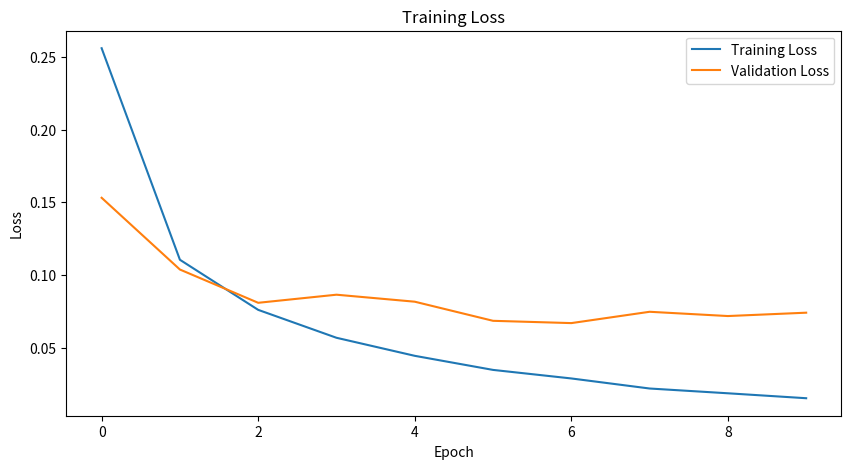

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()

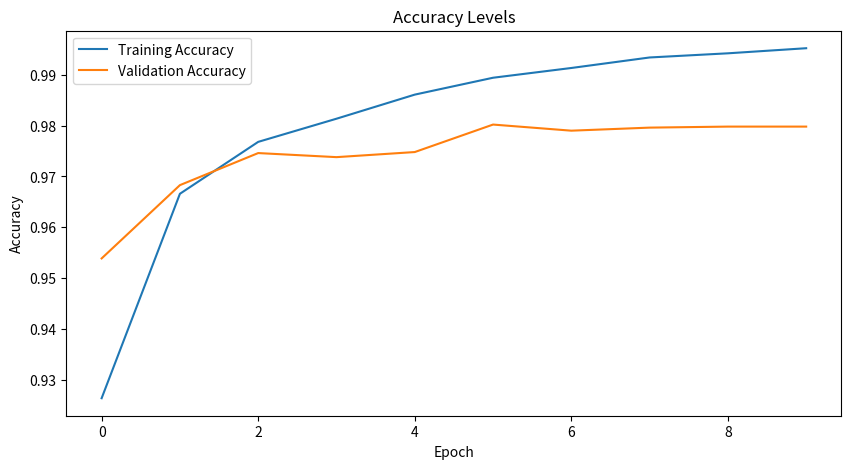

In [ ]:
# Plot the accuracy levels
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Levels')
plt.show()

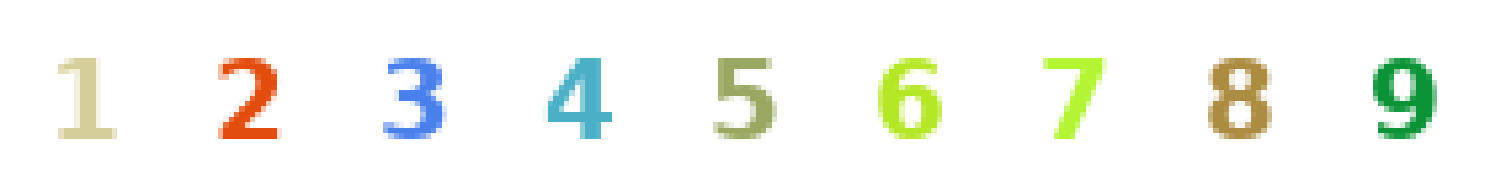

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import random

# Create custom images representing numbers 1 to 9 in RGB format
custom_images_rgb = []
for i in range(1, 10):
    img = Image.new('RGB', (28, 28), color=(255, 255, 255))
    d = ImageDraw.Draw(img)
    fnt = ImageFont.truetype('/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf', 20)
    d.text((7, 5), str(i), font=fnt, fill=(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
    custom_images_rgb.append(img)

# Display the custom images
fig, axes = plt.subplots(1, 9, figsize=(15, 2))
for ax, img in zip(axes, custom_images_rgb):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 93ms/step


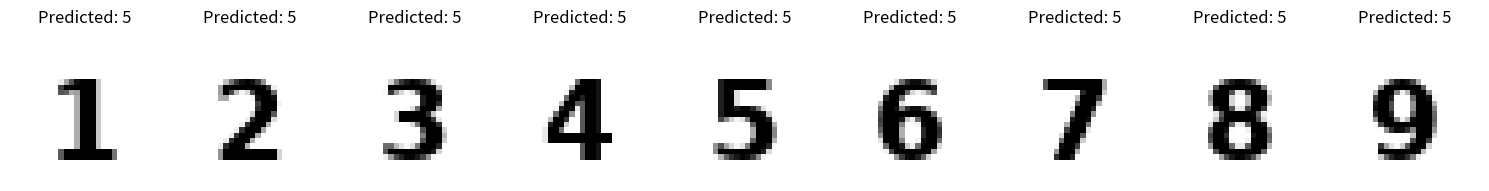

In [ ]:
import numpy as np

# Preprocess the custom images
custom_images_preprocessed = []
for img in custom_images_rgb:
    img_gray = img.convert('L')
    img_array = np.array(img_gray)
    img_normalized = img_array.astype('float32') / 255.0
    custom_images_preprocessed.append(img_normalized)

# Convert the preprocessed images to a numpy array
custom_images_preprocessed = np.array(custom_images_preprocessed)

# Use the trained model to predict the numbers in the custom images
predictions = model.predict(custom_images_preprocessed)
predicted_numbers = np.argmax(predictions, axis=1)

# Display the preprocessed images and the results of the predictions
fig, axes = plt.subplots(1, 9, figsize=(15, 2))
for ax, img, pred in zip(axes, custom_images_preprocessed, predicted_numbers):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Predicted: {pred}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
The image representing the number 1 was predicted as 1.
The image representing the number 2 was predicted as 2.
The image representing the number 3 was predicted as 3.
The image representing the number 4 was predicted as 4.
The image representing the number 5 was predicted as 5.
The image representing the number 6 was predicted as 6.
The image representing the number 7 was predicted as 7.
The image representing the number 8 was predicted as 8.
The image representing the number 9 was predicted as 9

TENSORFLOW 